# Compare `ap_pipe` outputs to Martínez-Palomera et al. 2018

[Martinez-Palomera et al. 2018](http://adsabs.harvard.edu/abs/2018AJ....156..186M) classified sources in HiTS data using Source Extractor measurements.  Let's find variable sources we can use to compare to our processing.

In [1]:
import astropy.io.fits as fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
%matplotlib inline

In [2]:
CATALOG_DIR = '/project/ebellm/hits_dr1/classification/'

DR1 provides predicted classes, a labelled training set, the timeseries features, and the lightcurve themselves.  Load and examine them:

In [3]:
#predictions
predicted_hdulist = fits.open(CATALOG_DIR+'HiTS_RF_predictions.fits')
df = pd.DataFrame(predicted_hdulist[1].data) 

In [4]:
len(df)

2536100

In [5]:
df.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class'],
      dtype='object')

In [6]:
df.head()

ID                 internalID    raMedian  decMedian  \
0  HiTS090434-041626  Blind15A_02_S1_1856_0087   136.145756  -4.273908   
1  HiTS090434-042338  Blind15A_02_N1_1253_0089   136.145561  -4.394096   
2  HiTS090434-042506  Blind15A_02_N1_1587_0054   136.142838  -4.418445   
3  HiTS090434-042629  Blind15A_02_N1_1903_0088   136.145272  -4.441517   
4  HiTS090435-000829  Blind15A_04_S1_0030_0051   136.146090  -0.141399   

   Variable_prob  Periodic_prob  DSCT_Prob  EB_Prob  ROTVAR_Prob  RRLYR_Prob  \
0       0.000000            NaN        NaN      NaN          NaN         NaN   
1       0.000000            NaN        NaN      NaN          NaN         NaN   
2       0.000000            NaN        NaN      NaN          NaN         NaN   
3       0.000000            NaN        NaN      NaN          NaN         NaN   
4       0.033194            NaN        NaN      NaN          NaN         NaN   

   CV_Prob  QSO_Prob  SNe_Prob Predicted_class  
0      NaN       NaN       NaN          NV      
1      NaN       NaN       NaN          NV      
2      NaN       NaN       NaN          NV      
3      NaN       NaN       NaN          NV      
4      NaN       NaN       NaN          NV

In [7]:
#labels
labeled_hdulist = fits.open(CATALOG_DIR+'HiTS_labeled_set.fits')
dfl = pd.DataFrame(labeled_hdulist[1].data) 

In [8]:
len(dfl)

8921

In [9]:
dfl.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'spCl', 'spSubCl',
       'Var_Type', 'Var_subType', 'Augmented_data'],
      dtype='object')

In [10]:
dfl.head()

ID                 internalID    raMedian  decMedian  spCl  \
0  HiTS090436-002411  Blind15A_04_N1_1366_0146   136.152598  -0.403065  QSO    
1  HiTS090706-001839  Blind15A_04_N3_0096_0232   136.779011  -0.310859  QSO    
2  HiTS090746-001856  Blind15A_04_N3_0161_2502   136.945008  -0.315632  QSO    
3  HiTS090749-002257  Blind15A_04_N3_1074_2666   136.956927  -0.382516  QSO    
4  HiTS090828-002440  Blind15A_04_N4_1466_0651   137.120495  -0.411324  QSO    

                 spSubCl Var_Type Var_subType  Augmented_data  
0  BROADLINE               QSO                            0.0  
1  BROADLINE               QSO                            0.0  
2  BROADLINE               QSO                            0.0  
3  BROADLINE               QSO                            0.0  
4  BROADLINE               QSO                            0.0

Since the entire feature set is large, we write out a subset below.

In [11]:
# features
# entire feature set, 1.3 GB--run on first processing
#features_hdulist = fits.open(CATALOG_DIR+'../features/HiTS_2014u2015_features.fits')

# only the features for sources in our fields, 67 MB
features_hdulist = fits.open(CATALOG_DIR+'../features/HiTS_2014u2015_features_DM-dataset-subset.fits')
dff = pd.DataFrame(features_hdulist[1].data) 

In [12]:
len(dff)

124368

In [13]:
dff.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Amplitude',
       'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_mean',
       'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e', 'FluxPercentileRatioMid20',
       'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50',
       'FluxPercentileRatioMid65', 'FluxPercentileRatioMid80',
       'Freq1_harmonics_amplitude_0', 'Freq1_harmonics_amplitude_1',
       'Freq1_harmonics_amplitude_2', 'Freq1_harmonics_amplitude_3',
       'Freq1_harmonics_rel_phase_0', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_0', 'Freq2_harmonics_rel_phase_1',
       'Freq2_harmonics_rel_phase_2', 'Freq2_harmonics_rel_phase_3',
       'Freq3_harmonics_amplitude_0', 'Freq3_harmonics_amplitude_1',
       'Freq3_harmonics_amplitude_2', 'Freq

In [14]:
dff.head()

ID                internalID    raMedian  decMedian  \
0  HiTS095628+020347  Blind15A_26_N1_1960_1102  149.117715   2.063287   
1  HiTS095643+020619  Blind15A_26_N1_1382_1988  149.182342   2.105330   
2  HiTS095647+020746  Blind15A_26_N1_1049_2172  149.195837   2.129622   
3  HiTS095710+021004  Blind15A_26_N1_0520_3505  149.293023   2.168028   
4  HiTS095708+020702  Blind15A_26_N1_1214_3389  149.284482   2.117331   

   Amplitude  AndersonDarling  Autocor_length  Beyond1Std     CAR_mean  \
0   0.101319         0.612556             1.0    0.370370  6724.606310   
1   0.162075         0.452352             1.0    0.384615    82.185099   
2   0.217829         0.975659             1.0    0.565217  2011.562244   
3   0.178169         0.689832             1.0    0.230769   269.418684   
4   0.401509         0.497690             1.0    0.294118    37.930080   

      CAR_sigma  ...       Rcs      Skew  SlottedA_length  SmallKurtosis  \
0  1.065870e+00  ...  0.169197 -0.197716         0.067353      -0.773840   
1 -2.100876e-01  ...  0.201814 -0.315355         0.134705      -0.168237   
2  1.268985e+00  ...  0.194071 -0.073611         0.067353      -1.239662   
3 -2.134840e-01  ...  0.193819 -0.622881         0.067353       0.660920   
4 -3.885518e-09  ...  0.224307  0.781275         0.061279       1.979035   

        Std  StetsonK  StetsonK_AC       g-i       g-r       r-i  
0  0.062779  0.845155     0.752044  2.045993  1.551082  0.494911  
1  0.092393  0.757849     0.621054  2.206376  1.676316  0.530059  
2  0.146739  0.883950     0.690199  2.600005  1.669890  0.930114  
3  0.092219  0.760862     0.729567  1.721148  1.093950  0.627198  
4  0.189491  0.786695     0.634738  2.879747  1.901122  0.978625  

[5 rows x 69 columns]

strip out extraneous whitespace

In [15]:
df['Predicted_class'] = df['Predicted_class'].str.strip()
df['internalID'] = df['internalID'].str.strip()
dfl['internalID'] = df['internalID'].str.strip()
dff['internalID'] = dff['internalID'].str.strip()

merge the predicted class and the features

In [16]:
dfm = pd.merge(df,dff,on='internalID', how='inner', suffixes=('', '_feat'))

If loading all features, merged dataframe should be the same size as the predictions and the features.  Not true when loading a subset only.

In [17]:
len(dfm) == len(df) == len(dff)

False

In [18]:
dfm[['internalID','raMedian','raMedian_feat','decMedian','decMedian_feat']].head()

internalID    raMedian  raMedian_feat  decMedian  \
0  Blind15A_26_N1_1338_0071  149.042608     149.042608   2.108904   
1  Blind15A_26_N1_1077_0099  149.044718     149.044718   2.127953   
2  Blind15A_26_N1_0880_0109  149.045482     149.045482   2.142355   
3  Blind15A_26_N1_0826_0097  149.044569     149.044569   2.146292   
4  Blind15A_26_N1_0582_0108  149.045419     149.045419   2.164091   

   decMedian_feat  
0        2.108904  
1        2.127953  
2        2.142355  
3        2.146292  
4        2.164091

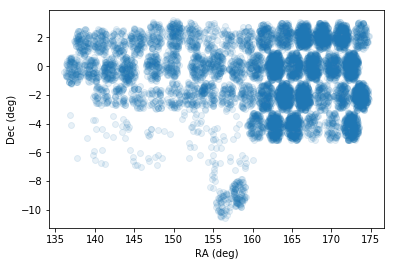

In [19]:
plt.scatter(dfl.raMedian, dfl.decMedian, alpha=0.1)
_=plt.xlabel('RA (deg)')
_=plt.ylabel('Dec (deg)')

How many sources of each class do we have in the labelled training set?

In [20]:
grp_label_class = dfl[['ID','Var_Type']].groupby('Var_Type').agg(len)
grp_label_class

ID
Var_Type      
CV          94
DSCT         1
EB         110
LPV          1
MISC         7
NV        5000
QSO       3495
ROTVAR       5
RRLYR      177
SNe         29
ZZ           2

How many sources of each class do we have in the predicted set?

In [21]:
grp_pred_class = df[['ID','Predicted_class']].groupby('Predicted_class').agg(len)
grp_pred_class

ID
Predicted_class         
CV                   250
DSCT                  95
EB                   372
NV               2532615
QSO                 1890
ROTVAR               654
RRLYR                195
SNe                   29

Having the number of SNe suggests that the label set is included in the predicted class.  Let's check:

In [22]:
intersect = pd.Index(df['ID']).intersection(pd.Index(dfl['ID']))
intersect

Index(['HiTS090740-011036', 'HiTS091058-005817', 'HiTS091208+005856',
       'HiTS092112-012506', 'HiTS092435+012846', 'HiTS092557-022835',
       'HiTS092715+000401', 'HiTS092957+001508', 'HiTS093417-000712',
       'HiTS094452-014943', 'HiTS095035-005802', 'HiTS095954-004247',
       'HiTS100014-025213', 'HiTS100104-001904', 'HiTS100723-023815',
       'HiTS100847-012723', 'HiTS100852+023729', 'HiTS100912+000102',
       'HiTS101234+002543', 'HiTS101345-014304', 'HiTS101925-023415',
       'HiTS102021-070838', 'HiTS102115-054325', 'HiTS102242-002913',
       'HiTS102258-001538', 'HiTS102436+013406', 'HiTS102445-022624',
       'HiTS102830-024233', 'HiTS102904-091044', 'HiTS103144-032847',
       'HiTS103844-014025', 'HiTS104202-000825', 'HiTS104249-005750',
       'HiTS104311+022625', 'HiTS104450-000137', 'HiTS104458+013410',
       'HiTS104702+021409', 'HiTS104802-011448', 'HiTS104846-003154',
       'HiTS105010-034654', 'HiTS105028+015930', 'HiTS105104-033720',
       'HiTS105136-0

In [23]:
len(intersect)

67

In [24]:
len(dfl)

8921

It's... strange to have some (rather than none or all) of the labeled examples in the predicted ones, but... let's move on.

### Finding Variables

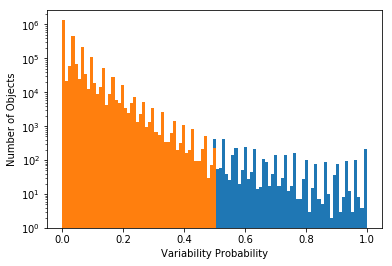

In [25]:
_ = plt.hist(df['Variable_prob'],bins=np.linspace(0,1,100))
_ = plt.hist(df.loc[df['Predicted_class'] == 'NV','Variable_prob'],bins=np.linspace(0,1,100),color='C1')
plt.yscale('log')
_=plt.xlabel('Variability Probability')
_=plt.ylabel('Number of Objects')

clearly the authors are using 0.5 as their variability cutoff/

Does variability probability correlate with periodic probability?

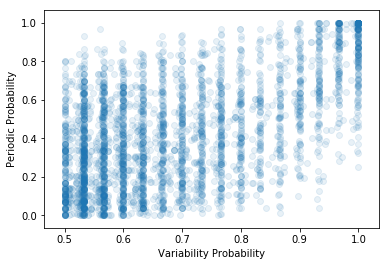

In [26]:
plt.scatter(df['Variable_prob'],df['Periodic_prob'],alpha=0.1)
_=plt.xlabel('Variability Probability')
_=plt.ylabel('Periodic Probability')

### Select only the fields we are using

In [27]:
fields = ['Blind15A_26','Blind15A_40','Blind15A_42', 'Blind14A_04', 'Blind14A_10', 'Blind14A_09']

w_in_our_fields = dfm['internalID'] == -999
for field in fields:
    w_in_our_fields |= dfm['internalID'].str.startswith(field)

In [28]:
wl_in_our_fields = dfl['internalID'] == -999
for field in fields:
    wl_in_our_fields |= dfl['internalID'].str.startswith(field)
np.sum(wl_in_our_fields)

0

So none of the labeled sources are in our fields.

In [29]:
wf_in_our_fields = dff['internalID'] == -999
for field in fields:
    wf_in_our_fields |= dff['internalID'].str.startswith(field)
dff_subset = dff[wf_in_our_fields]

In [30]:
# write out a small version of the features that overlaps with our fields
from astropy.table import Table
t = Table.from_pandas(dff_subset)
t.write(CATALOG_DIR+'../features/HiTS_2014u2015_features_DM-dataset-subset.fits', overwrite=True)

In [31]:
len(dfm[w_in_our_fields])

124368

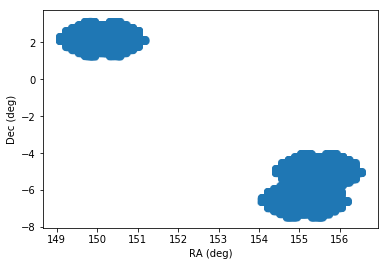

In [32]:
plt.scatter(dfm.loc[w_in_our_fields,'raMedian'], dfm.loc[w_in_our_fields,'decMedian'], alpha=0.1)
_=plt.xlabel('RA (deg)')
_=plt.ylabel('Dec (deg)')

how many of these are variable? 

In [33]:
w_variable = w_in_our_fields & (dfm['Variable_prob'] >= 0.5)

In [34]:
np.sum(w_variable)

165

... only 165 variable sources in our three fields?  That seems surprising...

In [35]:
dfm.loc[w_variable].head()

ID                 internalID    raMedian  decMedian  \
8     HiTS095611+020452   Blind15A_26_N1_1715_0146  149.048038   2.081381   
538   HiTS095645+021135   Blind15A_26_N1_0181_2093  149.190225   2.193068   
812   HiTS095652+023537  Blind15A_26_S14_1446_0379  149.220445   2.593841   
1358  HiTS095702+023628  Blind15A_26_S14_1253_0945  149.261780   2.607883   
2473  HiTS095726+015556   Blind15A_26_N8_1496_2317  149.361376   1.932343   

      Variable_prob  Periodic_prob  DSCT_Prob  EB_Prob  ROTVAR_Prob  \
8          0.523601       0.202651        NaN      NaN          NaN   
538        0.564932       0.635018      0.400    0.100        0.375   
812        0.962477       0.635836      0.025    0.125        0.750   
1358       0.532390       0.933333      0.550    0.225        0.050   
2473       0.972280       0.889344      0.050    0.175        0.625   

      RRLYR_Prob  ...       Rcs      Skew  SlottedA_length SmallKurtosis  \
8            NaN  ...  0.246009 -0.584446         0.134705      2.100608   
538        0.125  ...  0.119267 -0.133774         0.067353     -0.444997   
812        0.100  ...  0.227995 -0.317121         0.269410     -0.008631   
1358       0.175  ...  0.179956 -0.288333         0.067353     -1.067079   
2473       0.150  ...  0.269737 -0.035972         0.740878     -1.731678   

           Std  StetsonK  StetsonK_AC       g-i       g-r       r-i  
8     0.032812  0.773151     0.738233  2.859381  1.439736  1.419645  
538   0.123052  0.841553     0.815632  0.996040  0.769289  0.226751  
812   0.067782  0.849505     0.846981  1.911452  1.484048  0.427403  
1358  0.181790  0.853063     0.754798       NaN       NaN       NaN  
2473  0.089139  0.957841     0.948092  1.185192  0.894064  0.291128  

[5 rows x 82 columns]

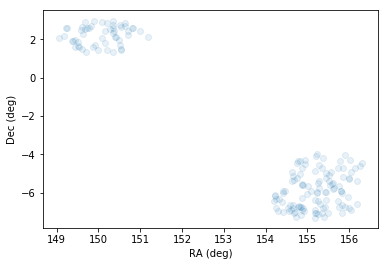

In [36]:
plt.scatter(dfm.loc[w_variable,'raMedian'], dfm.loc[w_variable,'decMedian'], alpha=0.1)
_=plt.xlabel('RA (deg)')
_=plt.ylabel('Dec (deg)')

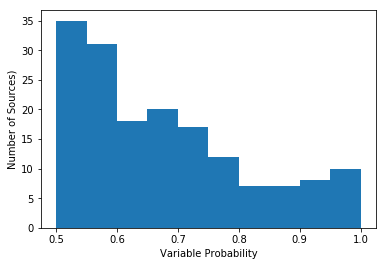

In [37]:
plt.hist(dfm.loc[w_variable, 'Variable_prob'])
_=plt.xlabel('Variable Probability')
_=plt.ylabel('Number of Sources)')

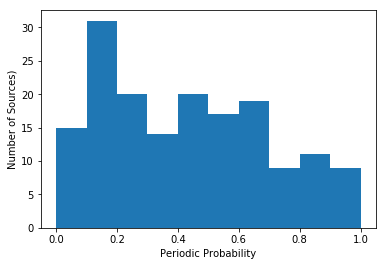

In [38]:
plt.hist(dfm.loc[w_variable, 'Periodic_prob'])
_=plt.xlabel('Periodic Probability')
_=plt.ylabel('Number of Sources)')

How many sources of each class are in our fields?

In [39]:
grp_pred_class = dfm.loc[w_variable,['ID','Predicted_class']].groupby('Predicted_class').agg(len)
grp_pred_class

ID
Predicted_class    
CV               11
DSCT              7
EB               17
QSO              89
ROTVAR           37
RRLYR             4

Let's look at the feature values

In [40]:
grp_pred_class = dfm.loc[w_variable].groupby('Predicted_class').agg(np.mean)
grp_pred_class

raMedian  decMedian  Variable_prob  Periodic_prob  \
Predicted_class                                                        
CV               152.761846  -1.478796       0.563395       0.231746   
DSCT             153.405285  -3.732112       0.650803       0.721967   
EB               155.149548  -5.277429       0.744714       0.783232   
QSO              153.590903  -3.434441       0.643433       0.241165   
ROTVAR           152.795194  -2.225786       0.752593       0.683322   
RRLYR            153.936841  -3.286644       0.739749       0.783136   

                 DSCT_Prob   EB_Prob  ROTVAR_Prob  RRLYR_Prob   CV_Prob  \
Predicted_class                                                           
CV                     NaN       NaN          NaN         NaN  0.575116   
DSCT              0.492857  0.178571     0.171429    0.157143       NaN   
EB                0.075000  0.632179     0.203115    0.089706       NaN   
QSO                    NaN       NaN          NaN         NaN  0.265407   
ROTVAR            0.041892  0.226351     0.646622    0.085135       NaN   
RRLYR             0.093750  0.206250     0.262500    0.437500       NaN   

                 QSO_Prob  ...       Rcs      Skew  SlottedA_length  \
Predicted_class            ...                                        
CV               0.413520  ...  0.183599  0.411048         0.146940   
DSCT                  NaN  ...  0.191799 -0.185630         0.096166   
EB                    NaN  ...  0.205220  0.312718         0.166368   
QSO              0.706503  ...  0.283321 -0.007465         0.307856   
ROTVAR                NaN  ...  0.305990  0.107588         0.459259   
RRLYR                 NaN  ...  0.259012  0.240205         0.118005   

                 SmallKurtosis       Std  StetsonK  StetsonK_AC       g-i  \
Predicted_class                                                             
CV                    0.632016  0.077974  0.818132     0.706837  1.126442   
DSCT                 -0.820012  0.147663  0.854853     0.785975  0.884610   
EB                   -0.458656  0.118067  0.842683     0.801817  0.504510   
QSO                  -0.155695  0.065968  0.831282     0.789458  1.131451   
ROTVAR               -0.944351  0.084088  0.853469     0.840167  0.942611   
RRLYR                -0.610763  0.166908  0.880224     0.826311  1.274719   

                      g-r       r-i  
Predicted_class                      
CV               0.810298  0.440980  
DSCT             0.568680  0.347430  
EB               0.587362 -0.055251  
QSO              0.757666  0.379318  
ROTVAR           0.806503  0.136944  
RRLYR            0.718454  0.556265  

[6 rows x 78 columns]

In [41]:
grp_pred_class = dfm.loc[w_variable].groupby('Predicted_class').agg(np.max)
grp_pred_class

ID                 internalID    raMedian  \
Predicted_class                                                             
CV               HiTS102256-044156  Blind15A_42_S25_1950_1092  155.734176   
DSCT             HiTS102125-070416  Blind15A_42_N16_1182_1480  155.355072   
EB               HiTS102514-042751   Blind15A_42_S6_1873_1512  156.310131   
QSO              HiTS102501-043544  Blind15A_42_S31_1017_3637  156.255521   
ROTVAR           HiTS102357-051719   Blind15A_42_S4_1974_3409  155.990095   
RRLYR            HiTS102147-055620   Blind15A_42_S9_0831_0328  155.447974   

                 decMedian  Variable_prob  Periodic_prob  DSCT_Prob  EB_Prob  \
Predicted_class                                                                
CV                2.903970       0.733333       0.499606        NaN      NaN   
DSCT              2.607883       0.933333       0.933333      0.675    0.350   
EB                2.843686       1.000000       1.000000      0.200    0.900   
QSO               2.691306       0.899860       0.498545        NaN      NaN   
ROTVAR            2.981913       1.000000       0.999606      0.300    0.475   
RRLYR             1.449816       1.000000       1.000000      0.200    0.275   

                 ROTVAR_Prob  RRLYR_Prob  ...       Rcs      Skew  \
Predicted_class                           ...                       
CV                       NaN         NaN  ...  0.217934  1.199477   
DSCT                   0.375        0.30  ...  0.284378  0.352765   
EB                     0.475        0.25  ...  0.383256  1.009743   
QSO                      NaN         NaN  ...  0.433218  1.013785   
ROTVAR                 1.000        0.40  ...  0.459417  1.115512   
RRLYR                  0.375        0.55  ...  0.444801  0.608078   

                 SlottedA_length SmallKurtosis       Std  StetsonK  \
Predicted_class                                                      
CV                      0.740878      1.271421  0.150158  0.873320   
DSCT                    0.269246     -0.307176  0.189816  0.887819   
EB                      0.807737      1.732576  0.348496  0.956179   
QSO                     1.817119      2.536113  0.239619  0.937647   
ROTVAR                  2.086653      0.942739  0.231762  0.957841   
RRLYR                   0.269914      0.649330  0.267963  0.914636   

                 StetsonK_AC       g-i       g-r       r-i  
Predicted_class                                             
CV                  0.860825  2.568114  1.310543  1.257571  
DSCT                0.824614  2.070641  1.382190  0.688451  
EB                  0.853447  2.495334  1.380473  1.308527  
QSO                 0.892772  2.859381  1.735175  1.419645  
ROTVAR              0.948092  2.641171  1.703239  1.647524  
RRLYR               0.881119  2.603276  1.341635  1.261641  

[6 rows x 81 columns]

Now let's explore how the features correlate

In [42]:
import sys
sys.path.append('/home/ebellm/.local/lib/python3.6/site-packages/')
import seaborn as sns

In [43]:
dfm.columns

Index(['ID', 'internalID', 'raMedian', 'decMedian', 'Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class', 'ID_feat',
       'raMedian_feat', 'decMedian_feat', 'Amplitude', 'AndersonDarling',
       'Autocor_length', 'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau',
       'Con', 'Eta_e', 'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_0',
       'Freq1_harmonics_rel_phase_1', 'Freq1_harmonics_rel_phase_2',
       'Freq1_harmonics_rel_phase_3', 'Freq2_harmonics_amplitude_0',
       'Freq2_harmonics_amplitude_1', 'Freq2_harmonics_amplitude_2',
       'Freq2_harmonics_amplitude_3', 'Freq2_harmonics_rel_phase_0',
       'Fre

In [44]:
class_cols = ['Variable_prob',
       'Periodic_prob', 'DSCT_Prob', 'EB_Prob', 'ROTVAR_Prob', 'RRLYR_Prob',
       'CV_Prob', 'QSO_Prob', 'SNe_Prob', 'Predicted_class']
feat_cols = ['Predicted_class', 
       'Amplitude', 'LinearTrend', 'MaxSlope',
       'Mean',  'Period_fit', 'PeriodLS', 'Std', 'StetsonK',
       'StetsonK_AC', 'g-i', 'g-r', 'r-i']
period_cols = ['Predicted_class','Amplitude','PeriodGLS','PeriodLS', 'PeriodWMCC', 'Period_fit']

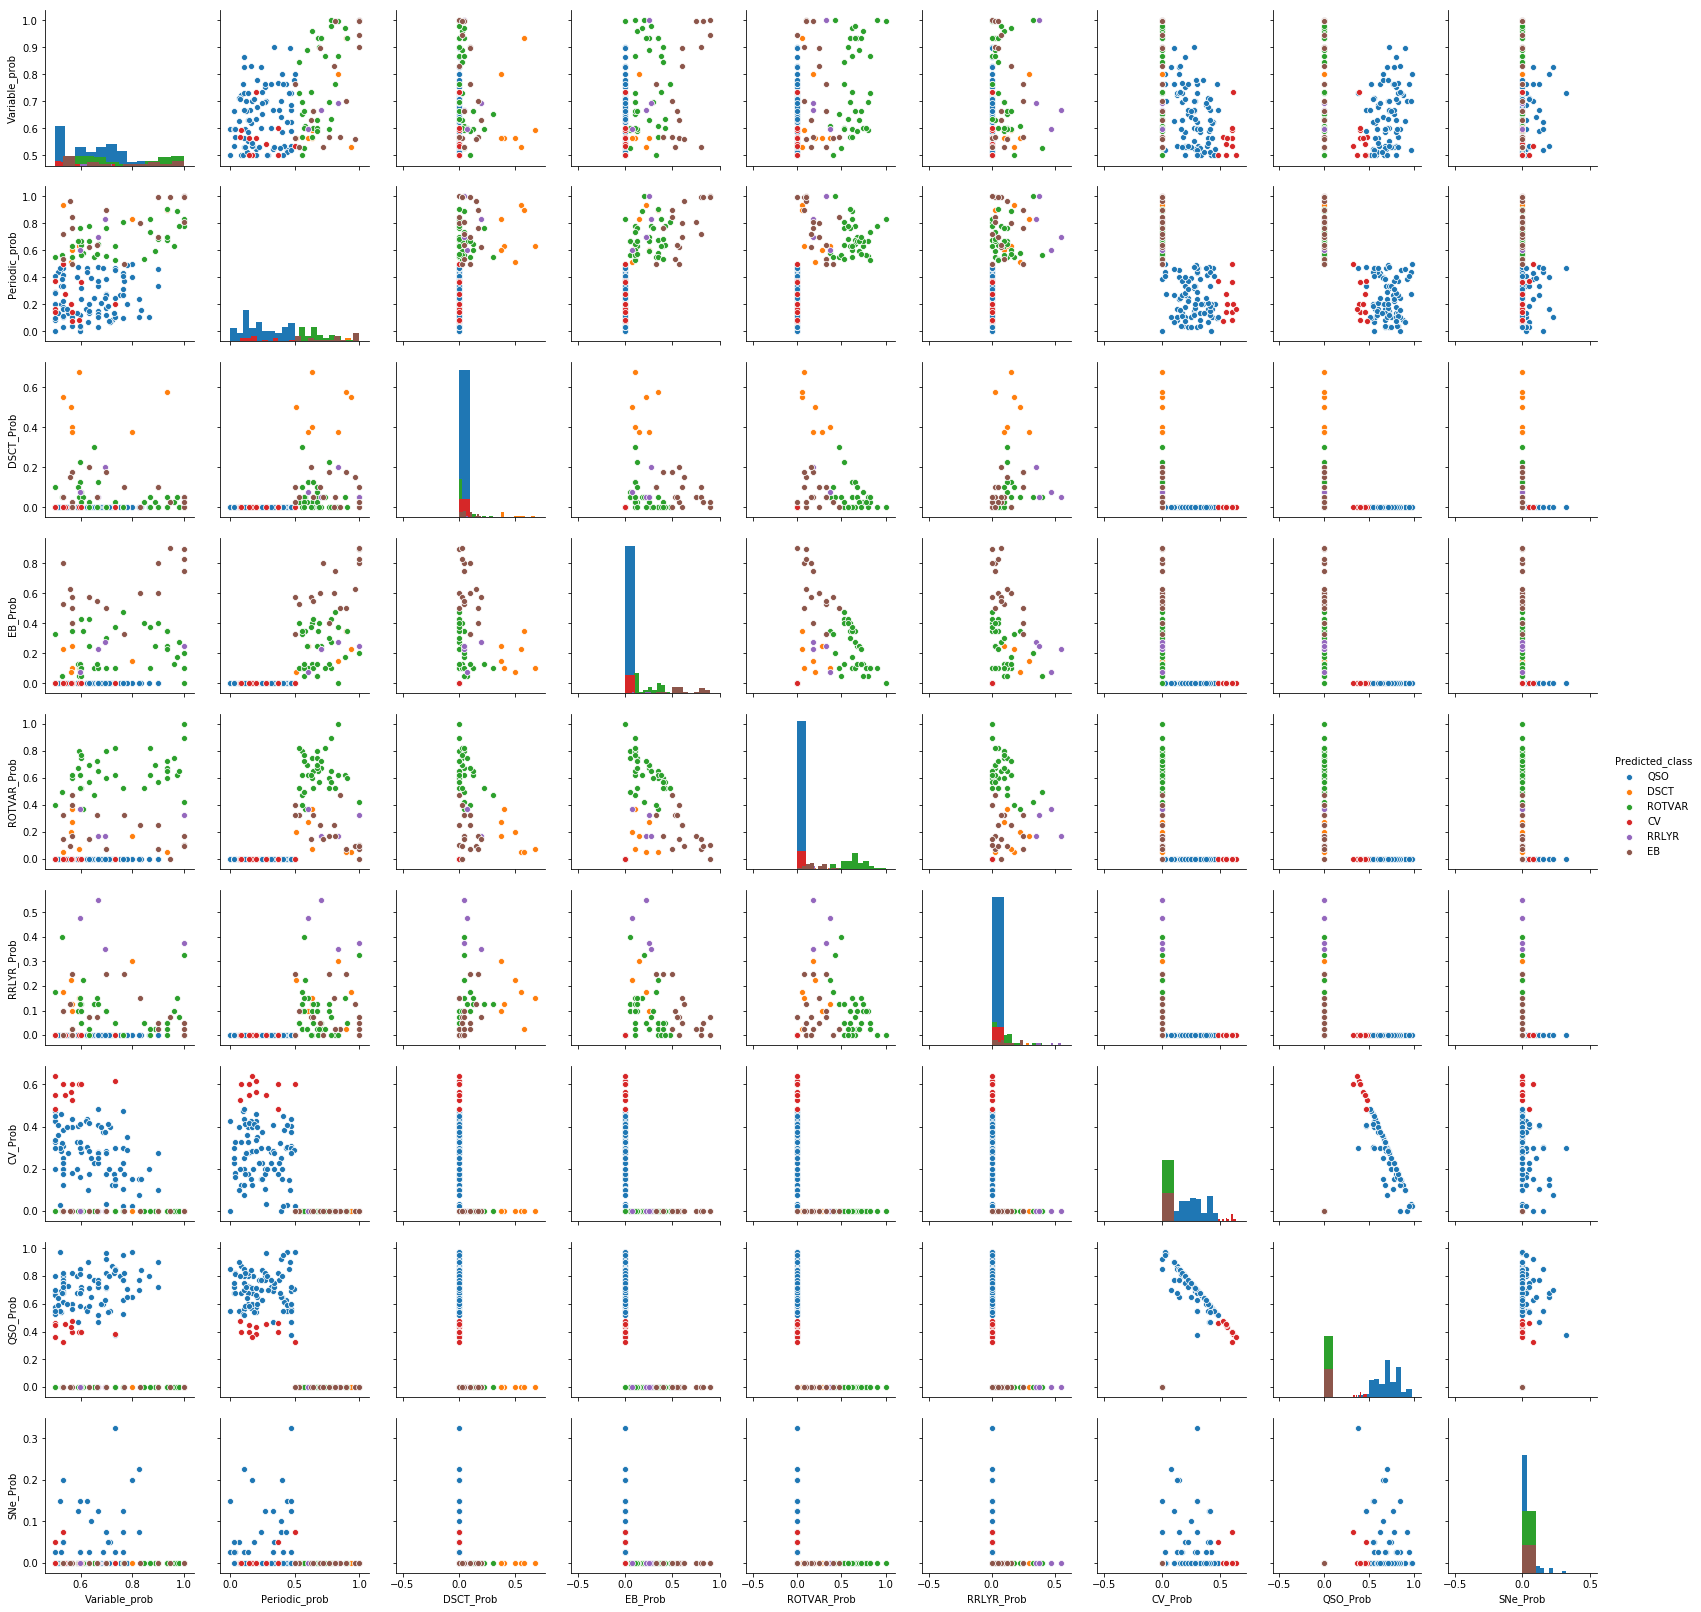

In [45]:
#tmp = dfm.loc[w_variable & class_cols]
sns.pairplot(dfm.loc[w_variable ,class_cols].fillna(0), hue='Predicted_class',diag_kind='hist')

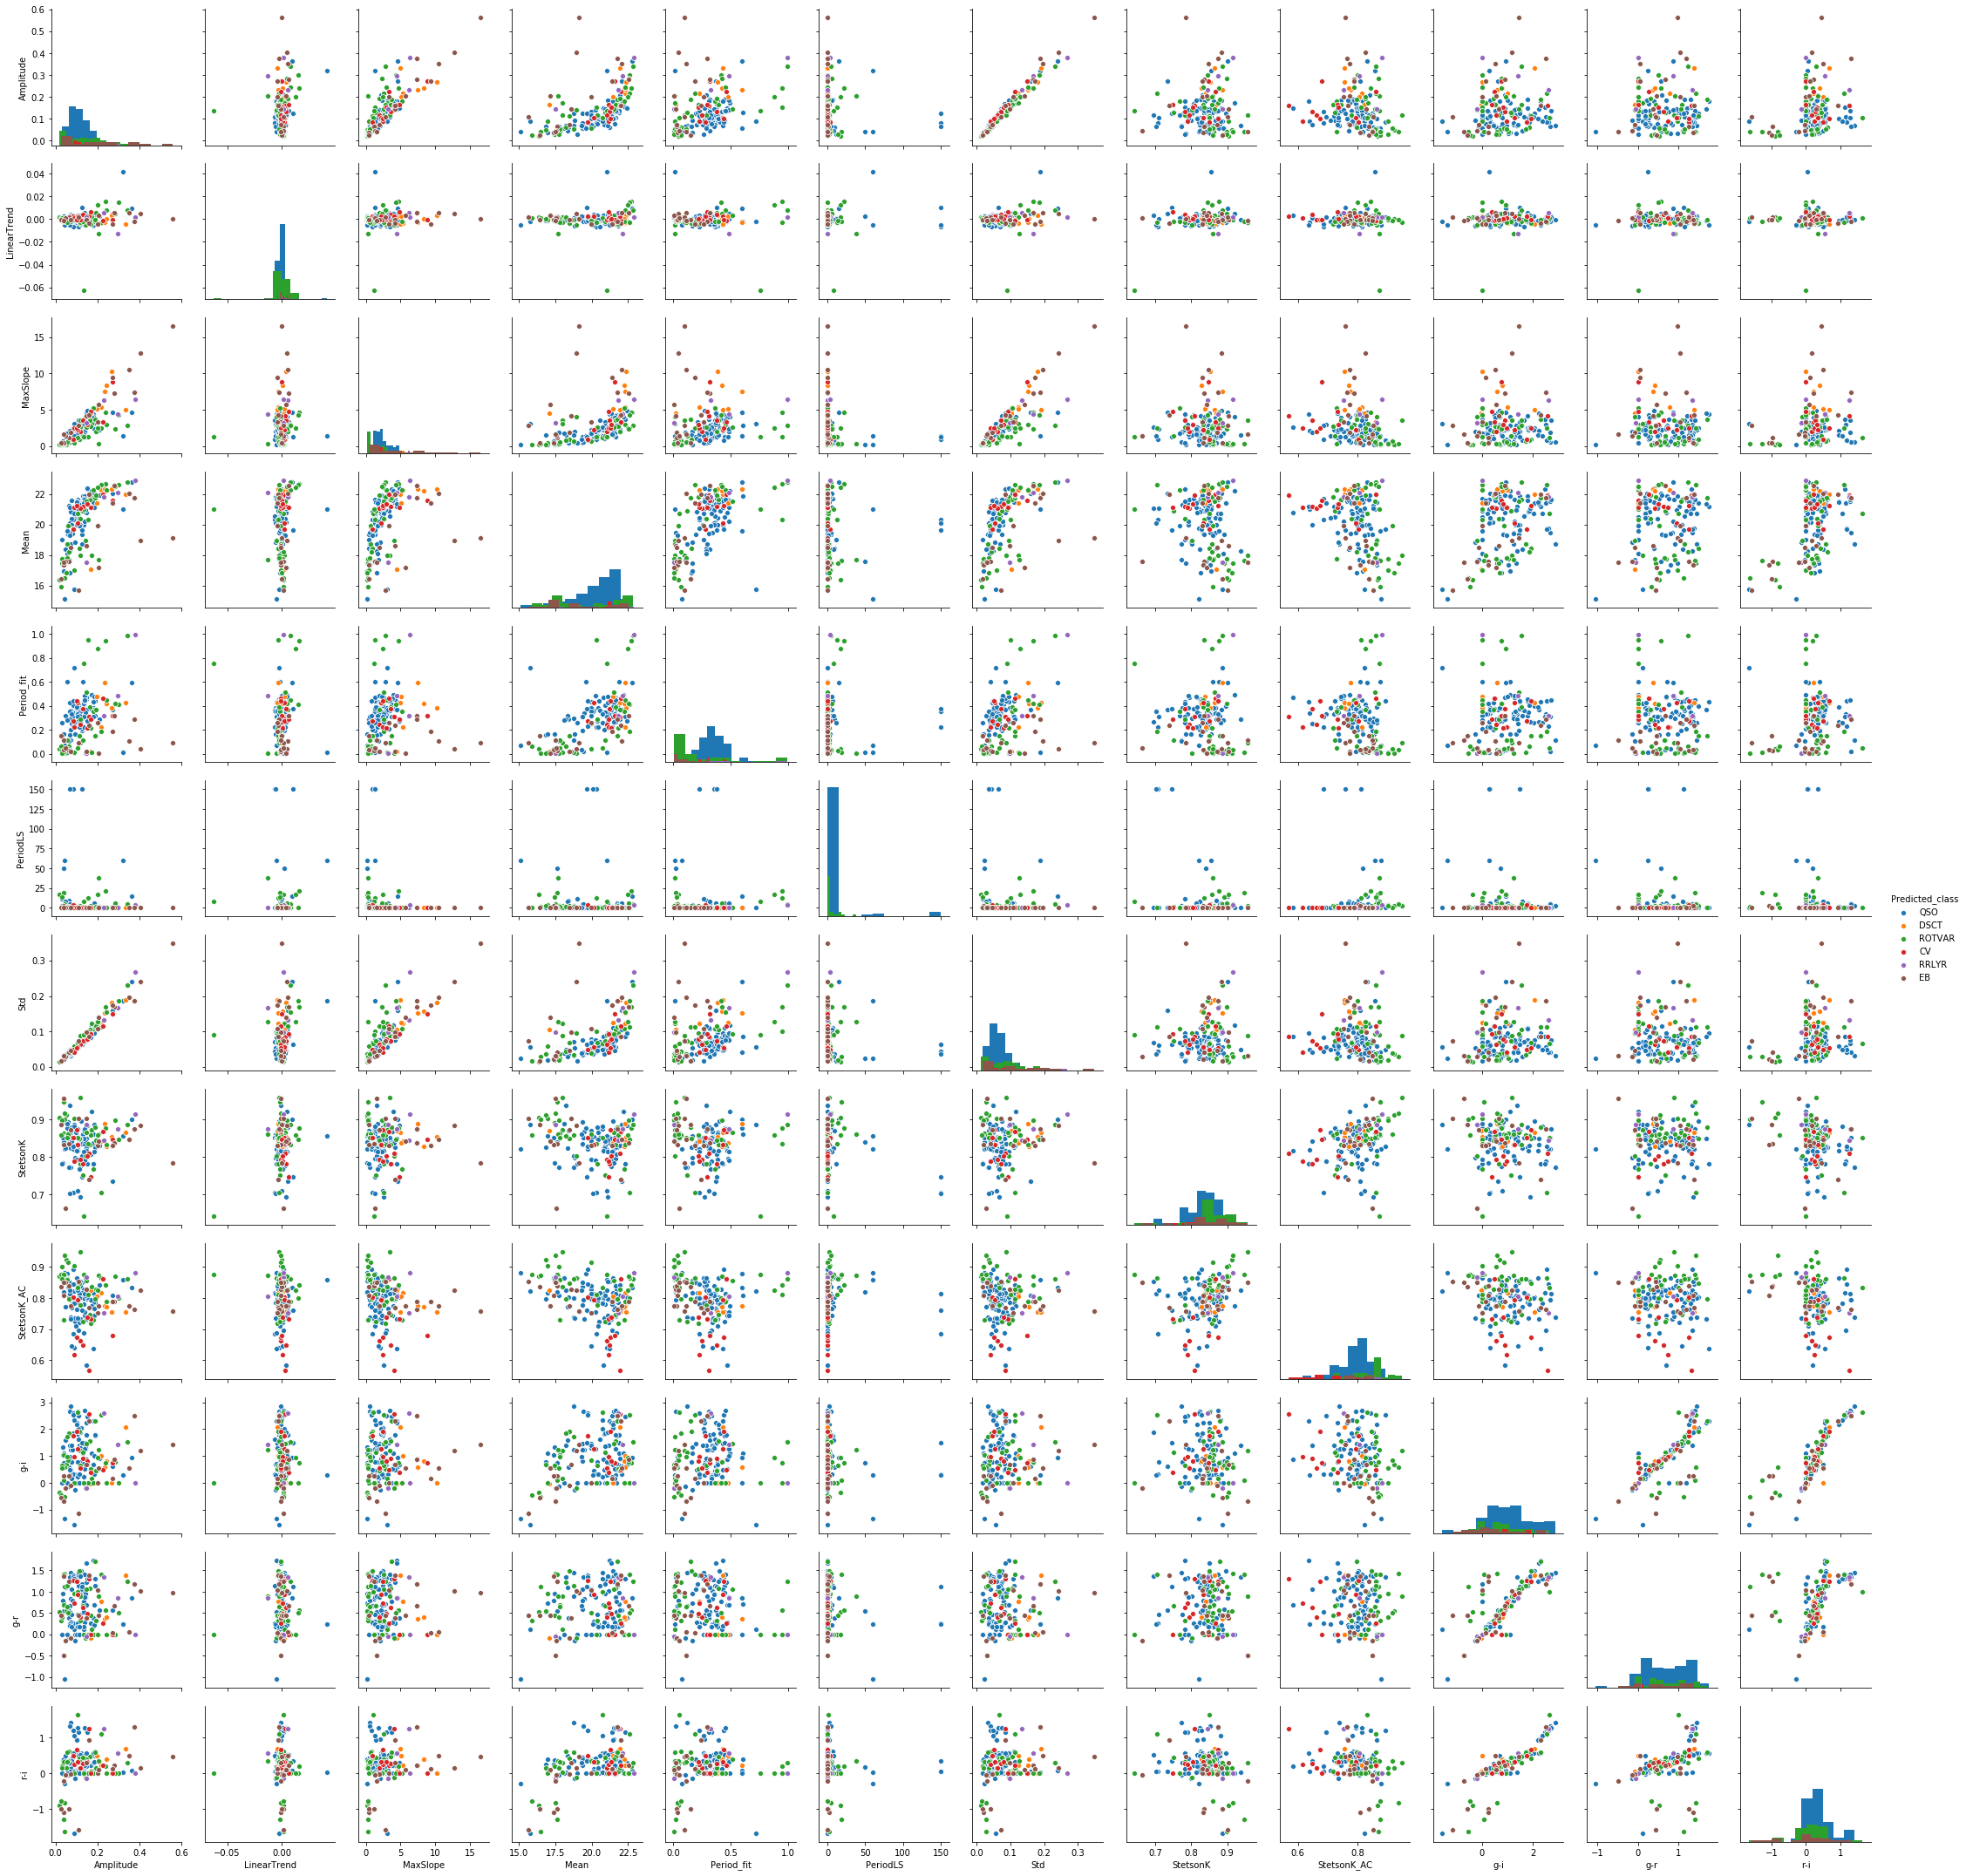

In [46]:
sns.pairplot(dfm.loc[w_variable ,feat_cols].fillna(0), hue='Predicted_class',diag_kind='hist')

There's less separation of classes in this subset of features than I might have expected...


Note that period_fit is from FATS, and is "the false-alarm probability of the largest periodogram value obtained with the Lomb- Scargle algorithm. Its value should be close to zero for a periodic time series."

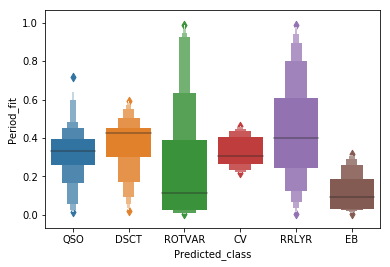

In [47]:
sns.boxenplot(x="Predicted_class", y="Period_fit",data=dfm[w_variable])

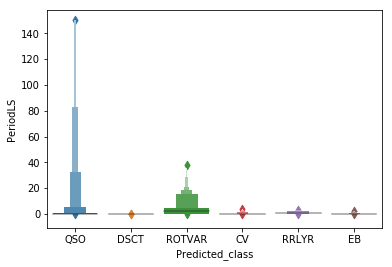

In [48]:
sns.boxenplot(x="Predicted_class", y="PeriodLS",data=dfm[w_variable])

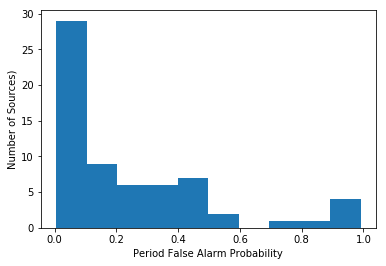

In [49]:
wperiod = w_variable & (dfm['Periodic_prob'] > 0.5)
plt.hist(dfm.loc[wperiod, 'Period_fit'])
_=plt.xlabel('Period False Alarm Probability')
_=plt.ylabel('Number of Sources)')

So the `Periodic_prob` is not closely related to the false alarm rate from the period fit...

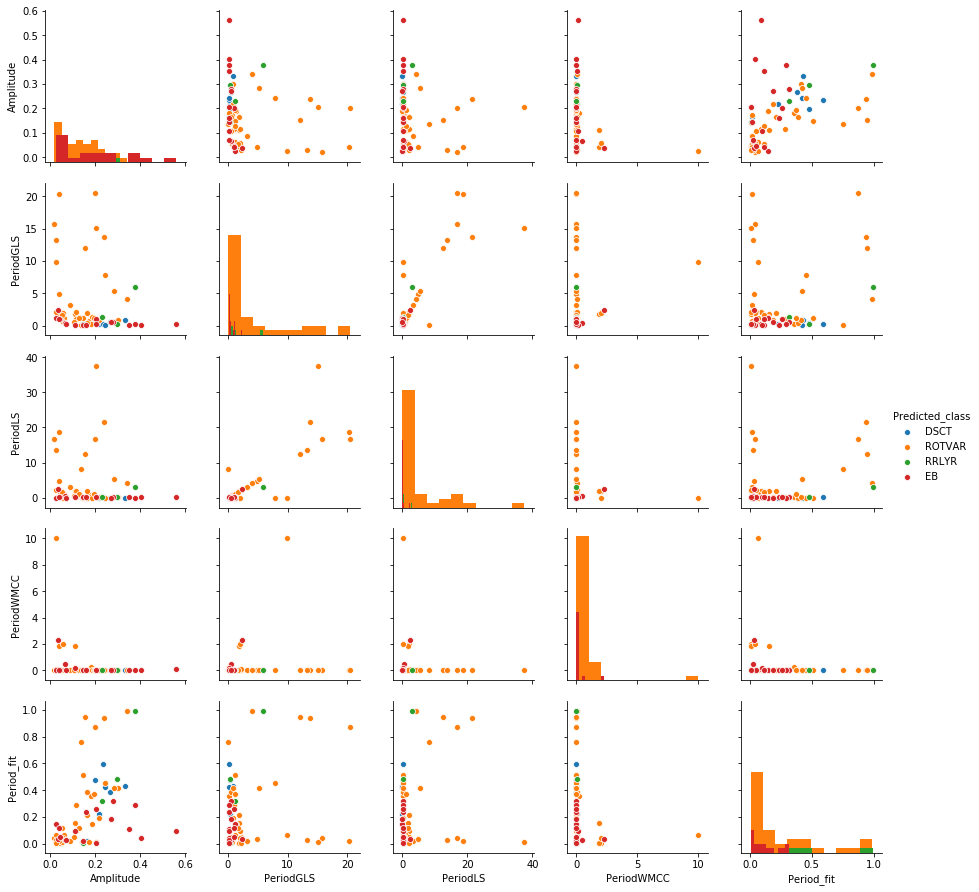

In [50]:
sns.pairplot(dfm.loc[wperiod ,period_cols].fillna(0), hue='Predicted_class',diag_kind='hist')

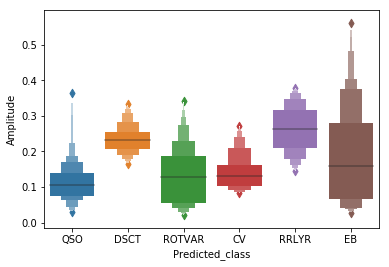

In [51]:
sns.boxenplot(x="Predicted_class", y="Amplitude",data=dfm[w_variable])

### Lightcurve plots

Make a convenience function to load and plot the lightcurve data

In [52]:
def plot_hits(row):
    """Plot HiTS DR1 lightcurves.
    
    Parameters
    ----------
    row : Pandas Dataframe row
        DR1 source data
    """
    plt.figure(figsize=(15,6))
    tok = row['internalID'].split('_')
    field = '_'.join([tok[0],tok[1]])
    chip = tok[2]
    #'/project/ebellm/hits_dr1/light_curves/Blind15A_42/S9/Blind15A_42_S9_LC_50.tar.gz'
    t = tarfile.open(f'/project/ebellm/hits_dr1/light_curves/{field}/{chip}/{field}_{chip}_LC_50.tar.gz')
    #'Blind15A_42_S9_0831_0328_g.dat'
    dat = t.extractfile(f"{row['internalID'].strip()}_g.dat")
    dfl = pd.read_table(dat,sep='\t')
    plt.subplot(121)
    plt.errorbar(dfl.MJD, dfl.MAG_AP1, dfl.MAGERR_AP1, fmt='o', linestyle='none')
    plt.xlabel('MJD')
    plt.ylabel('magnitude')
    pred_class = row['Predicted_class'].strip()
    class_prob = row[f"{pred_class}_Prob"]
    plt.title(f"{pred_class}: {class_prob:0.2f} | VarP: {row['Variable_prob']:0.2f} | PerP: {row['Periodic_prob']:0.2f} | Amplitude: {row['Amplitude']:0.2f}")
    plt.gca().invert_yaxis()
    if row['Periodic_prob'] > 0.5:
        plt.subplot(122)
        phase = (dfl.MJD.values % row['PeriodLS']) / row['PeriodLS']
        plt.errorbar(np.concatenate([phase, phase+1]), 
                     np.concatenate([dfl.MAG_AP1.values, dfl.MAG_AP1.values]), 
                     np.concatenate([dfl.MAGERR_AP1.values, dfl.MAGERR_AP1.values]), fmt='o', linestyle='none')
        plt.xlabel('Phase')
        plt.ylabel('magnitude')
        plt.title(f"Period: {row['PeriodLS']:0.2f} days | FAP: {row['Period_fit']:0.2f}")
        plt.gca().invert_yaxis()


/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:17: FutureWarning: read_table is deprecated, use read_csv instead.


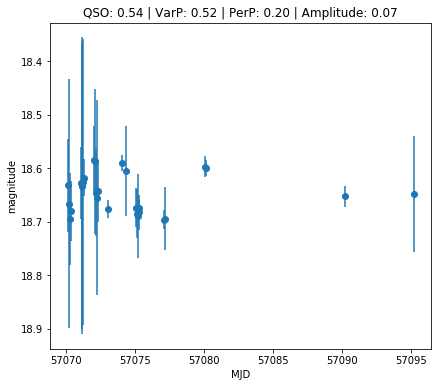

In [53]:
plot_hits(dfm.loc[w_variable].iloc[0])

/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/ipykernel/__main__.py:17: FutureWarning: read_table is deprecated, use read_csv instead.
/opt/lsst/software/stack/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


missing HiTS102304-064503


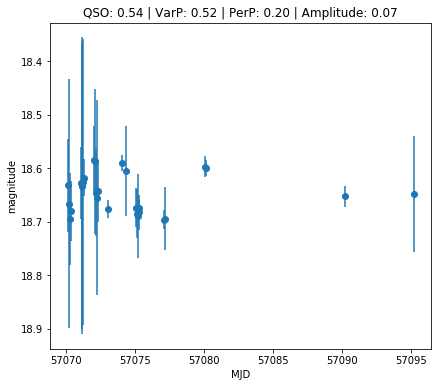

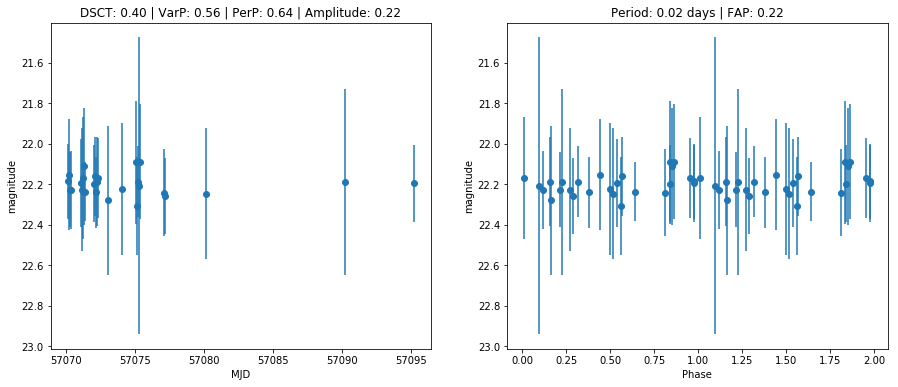

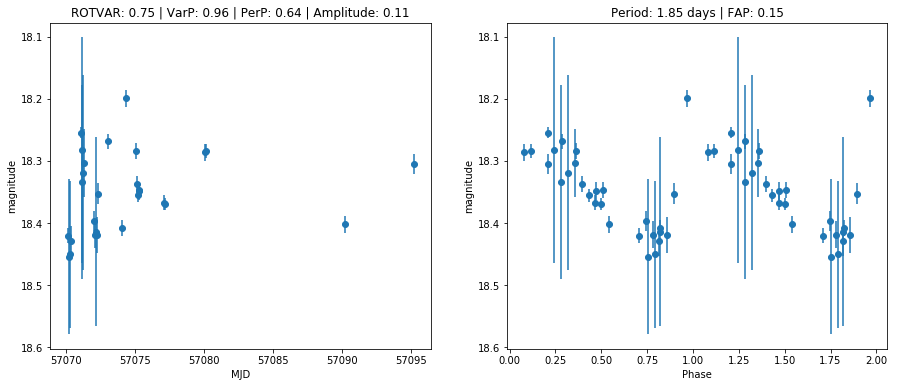

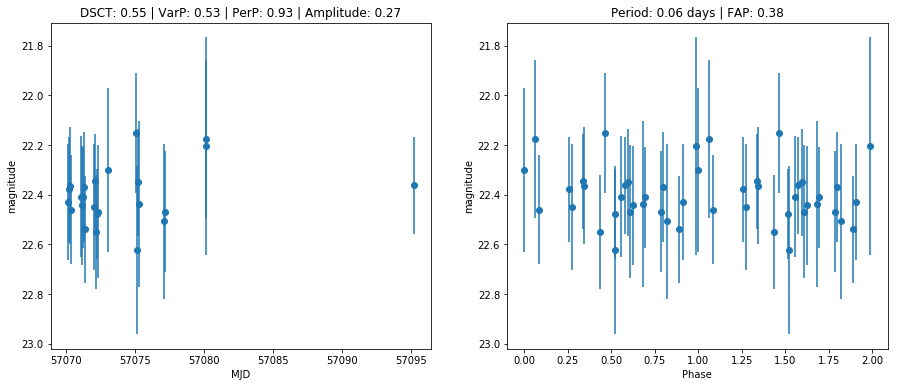

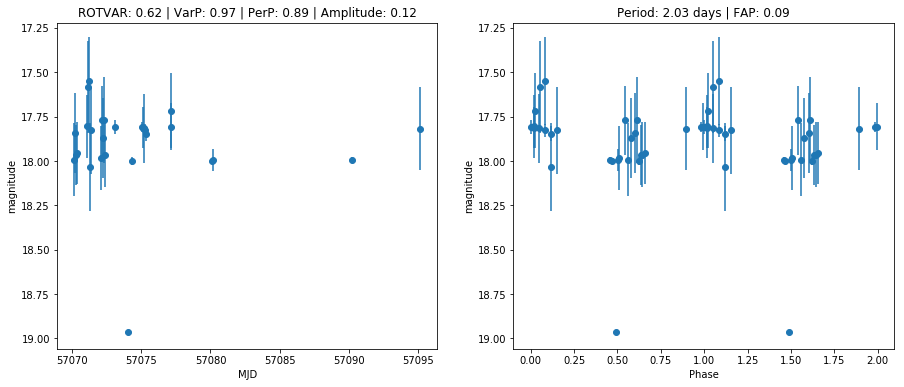

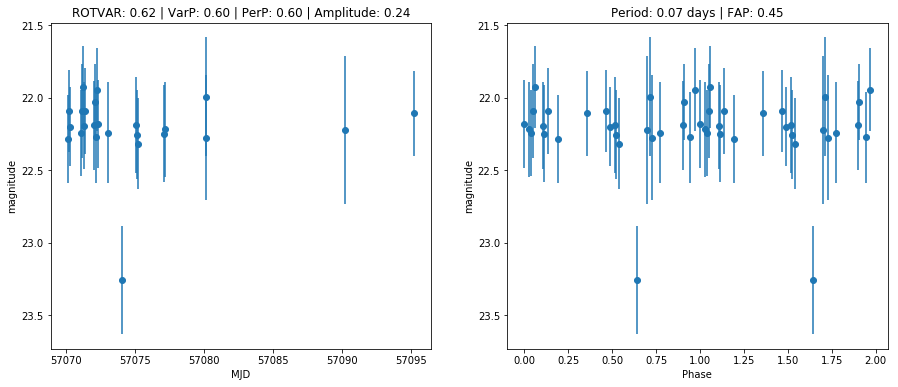

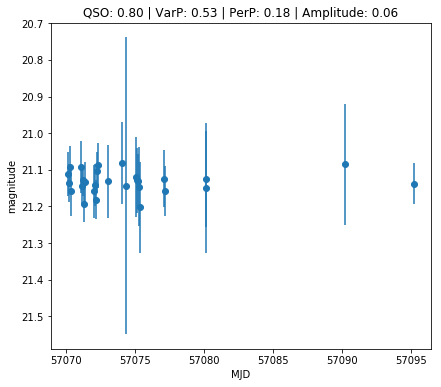

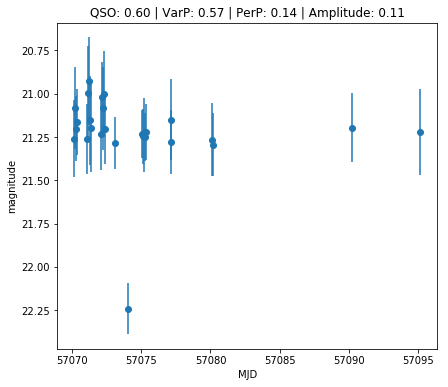

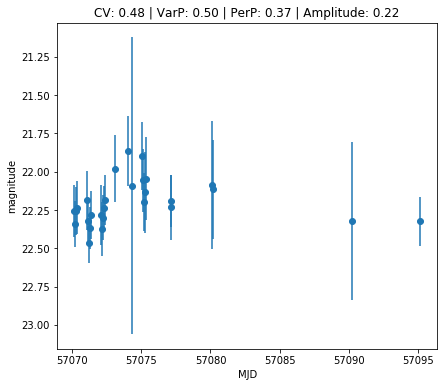

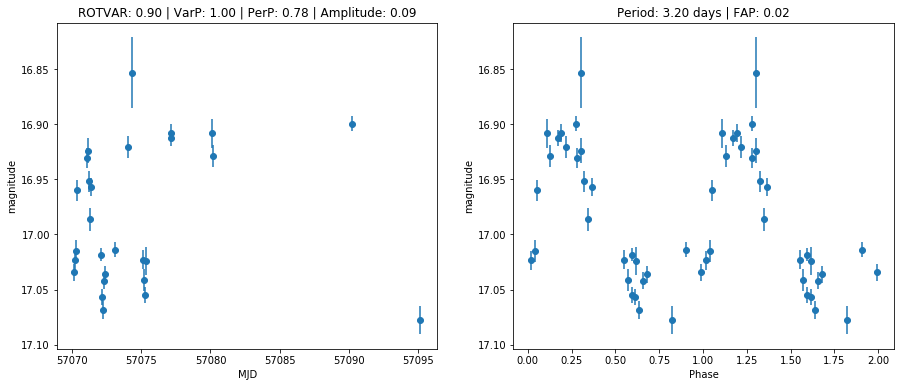

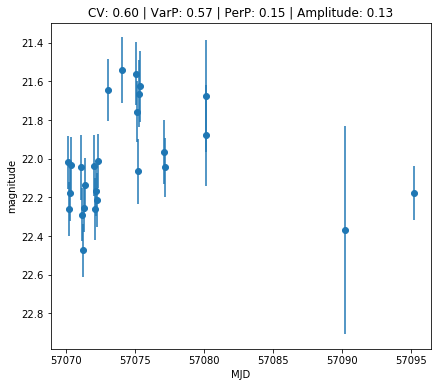

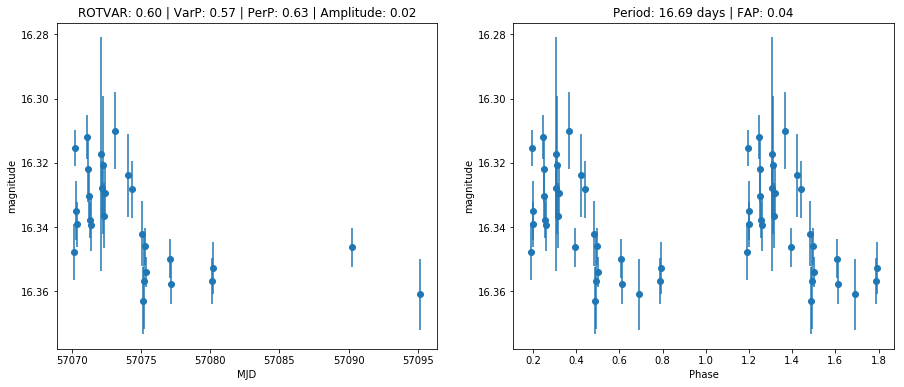

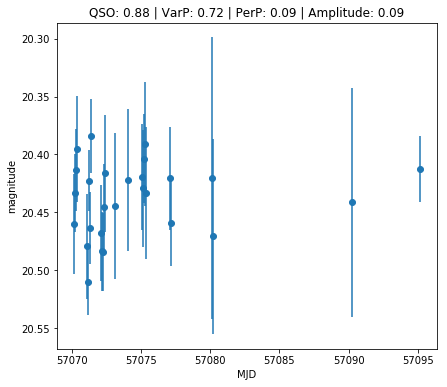

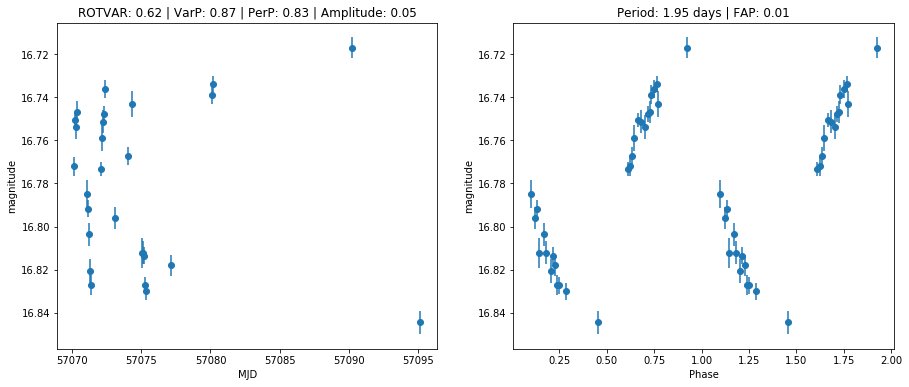

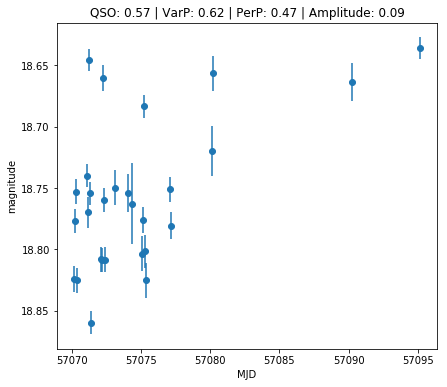

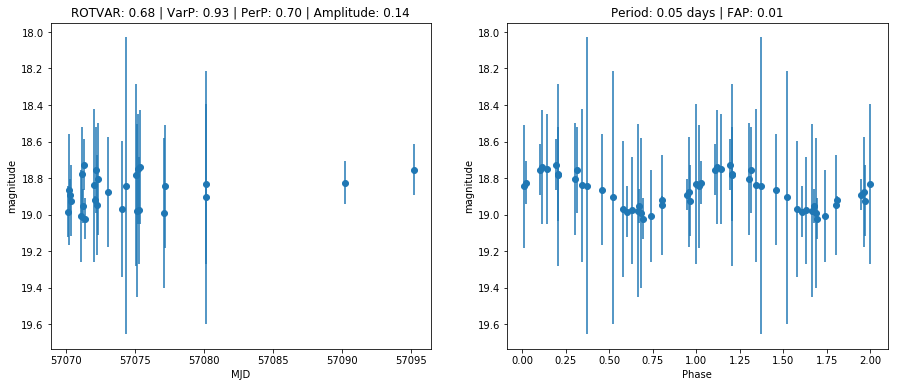

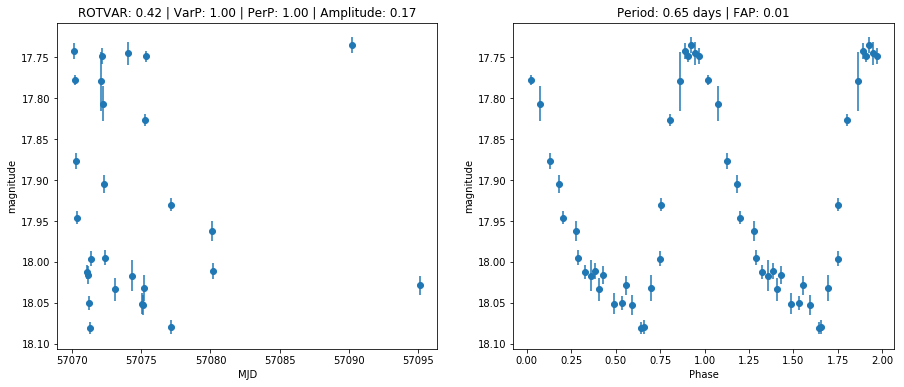

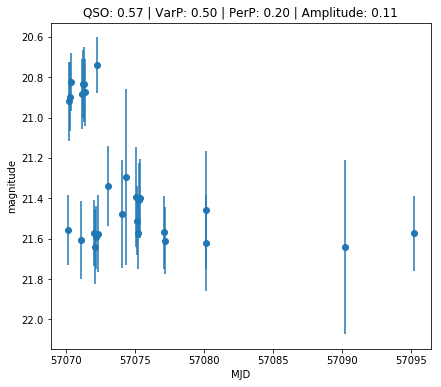

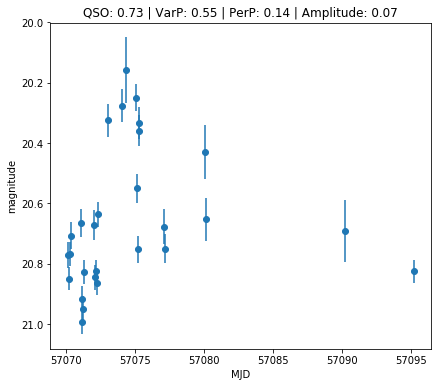

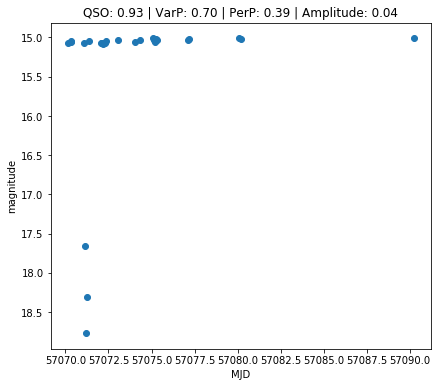

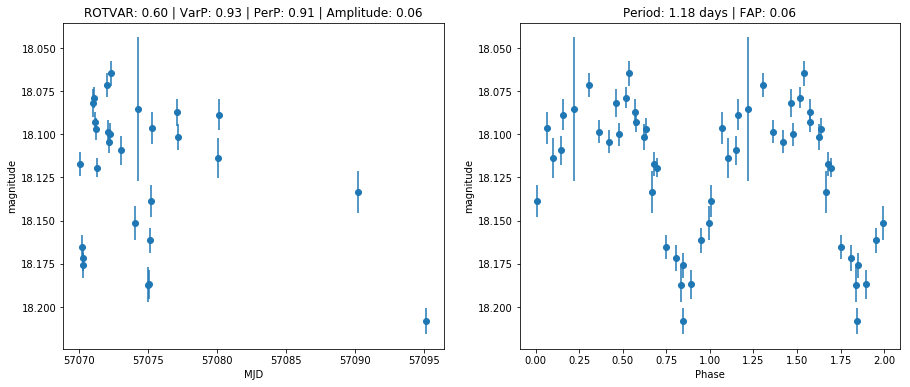

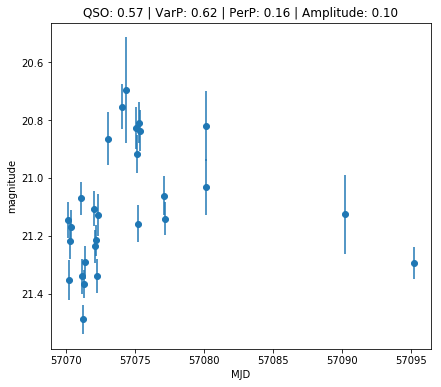

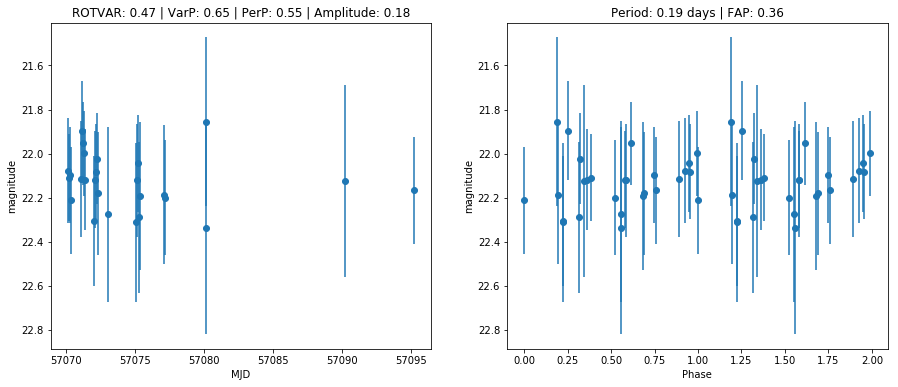

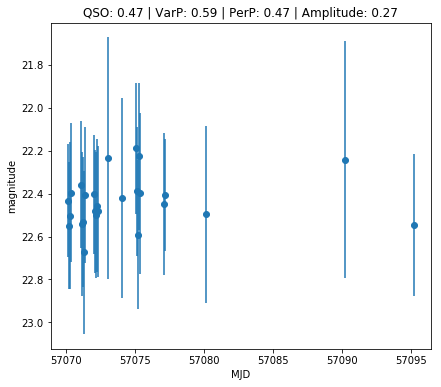

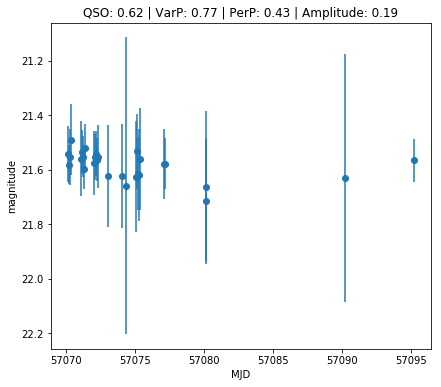

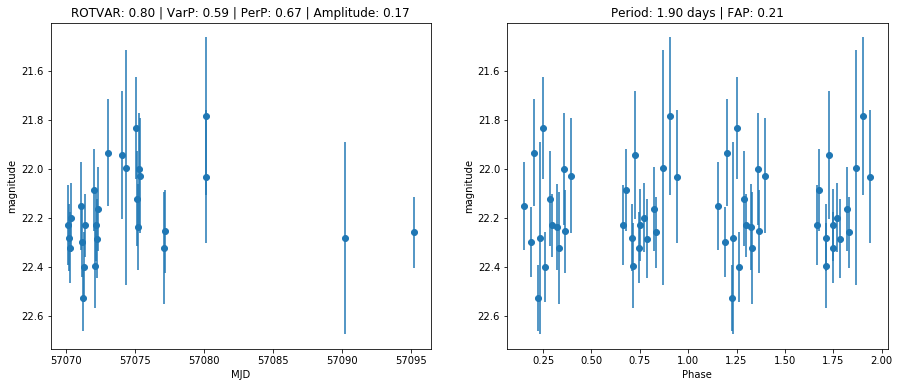

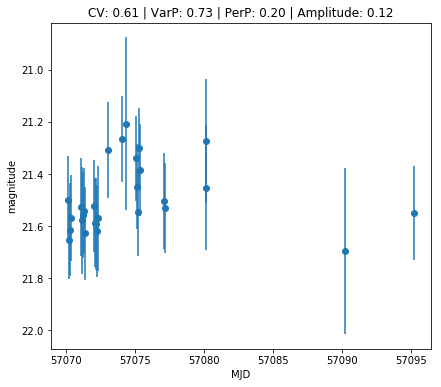

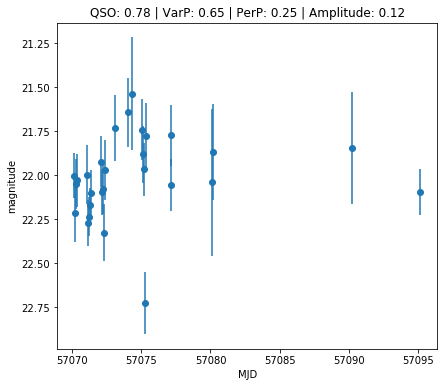

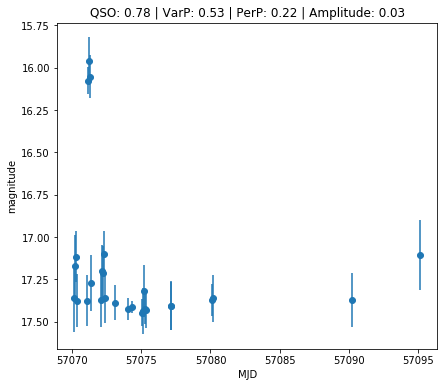

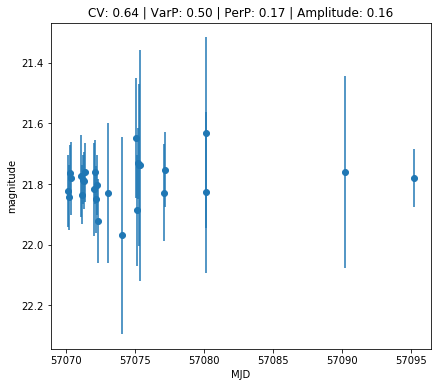

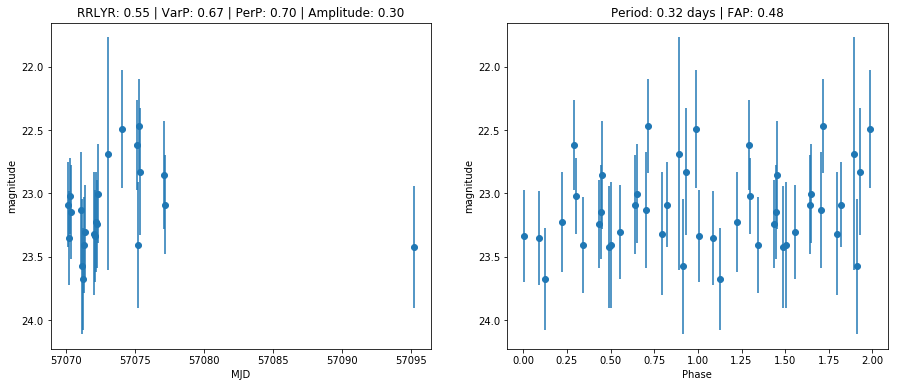

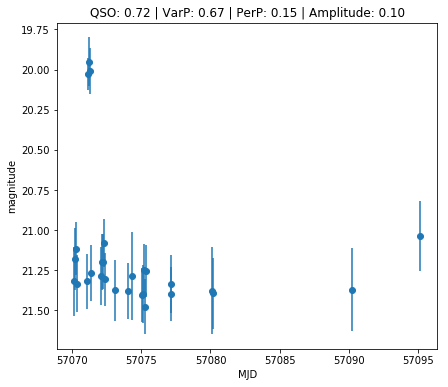

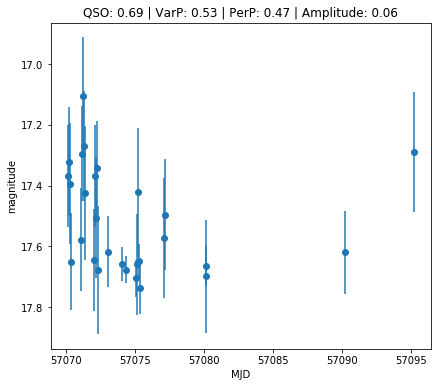

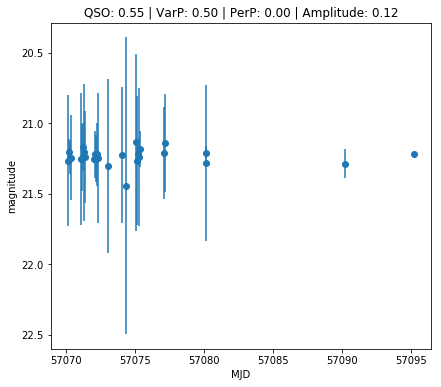

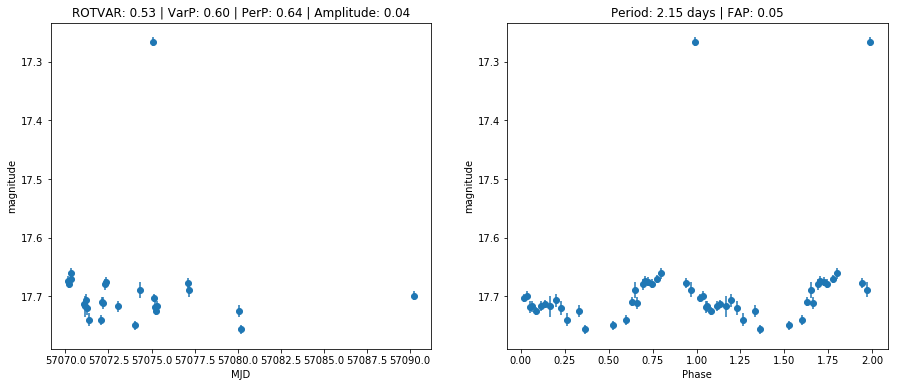

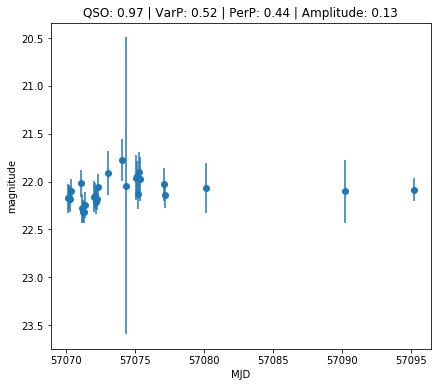

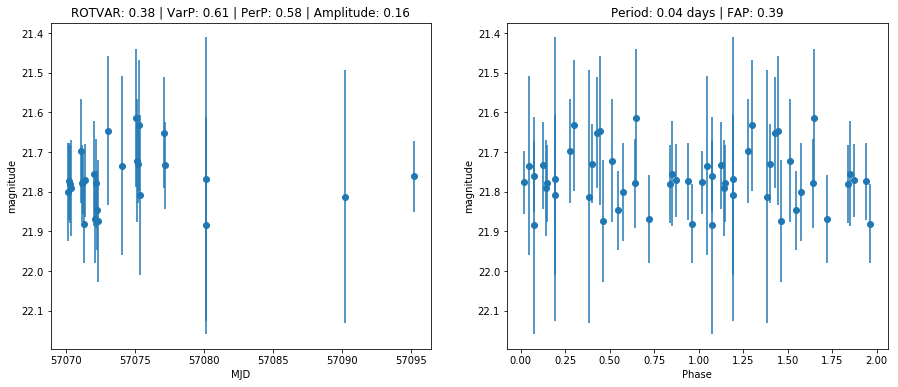

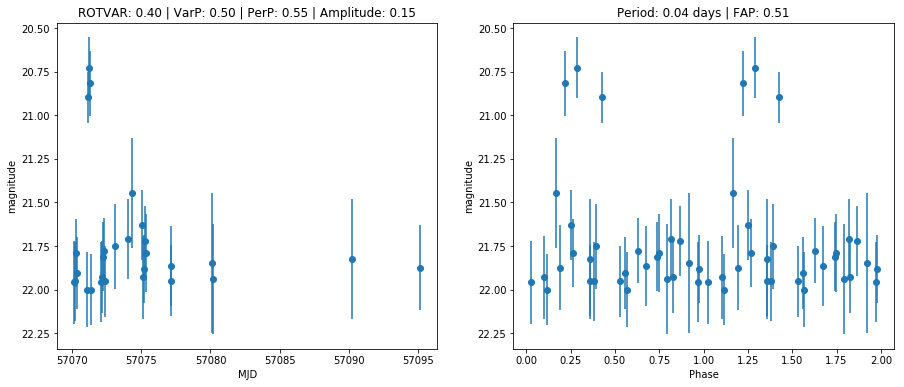

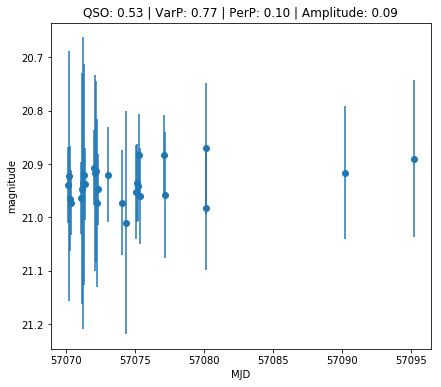

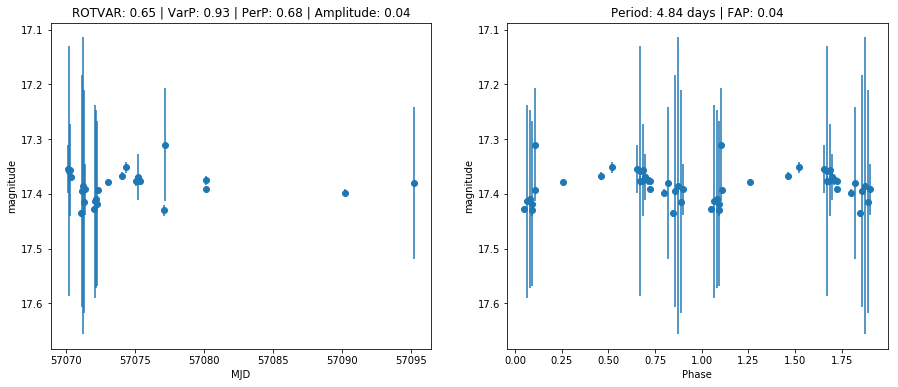

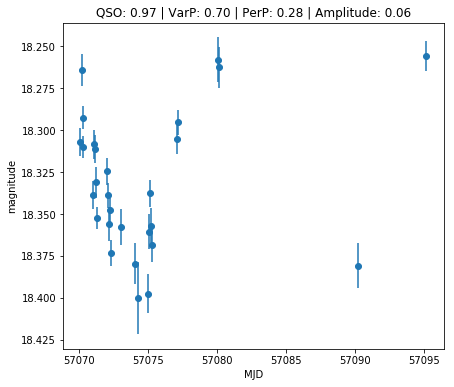

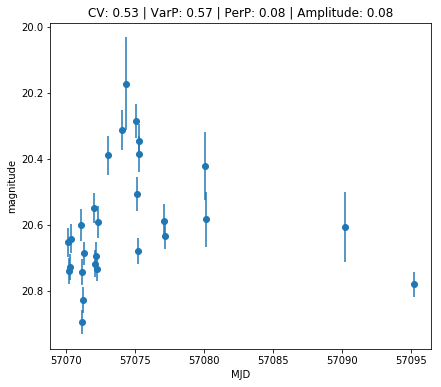

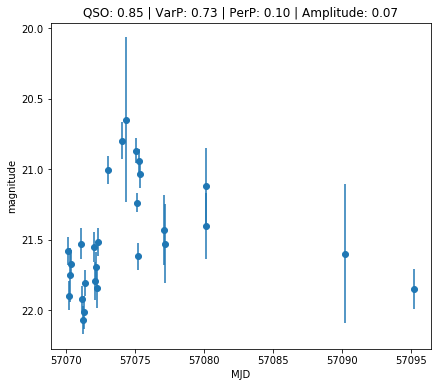

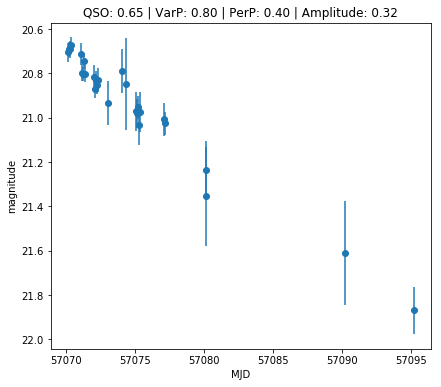

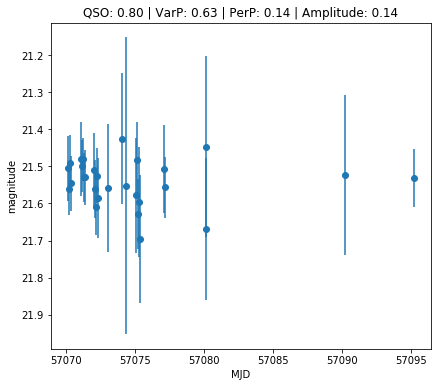

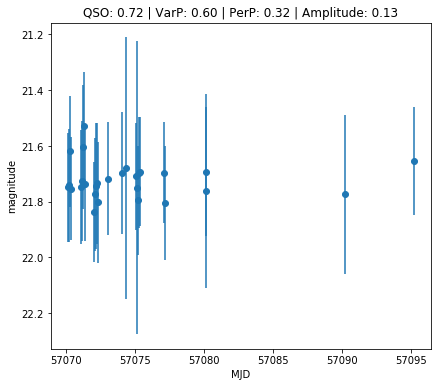

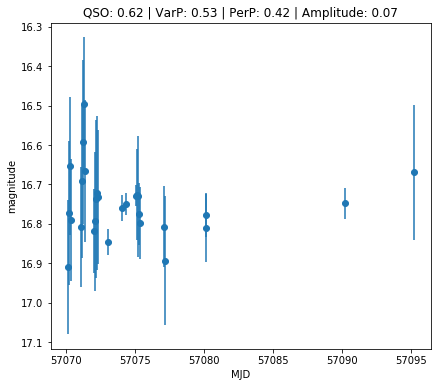

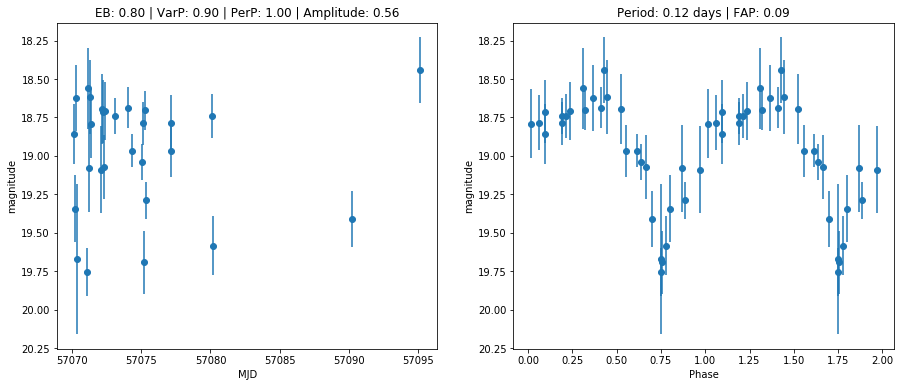

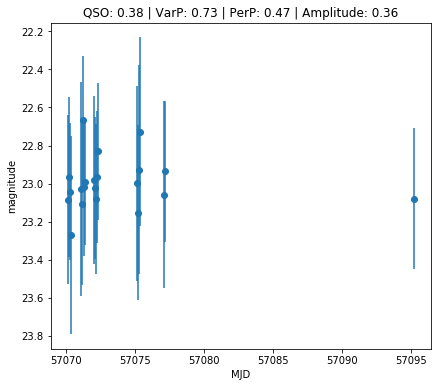

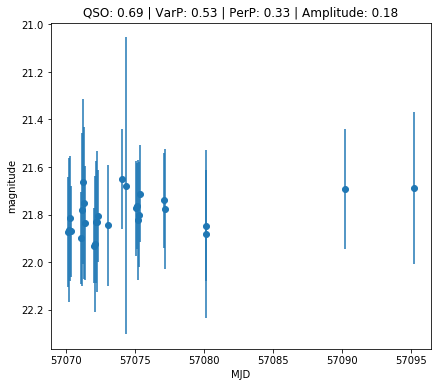

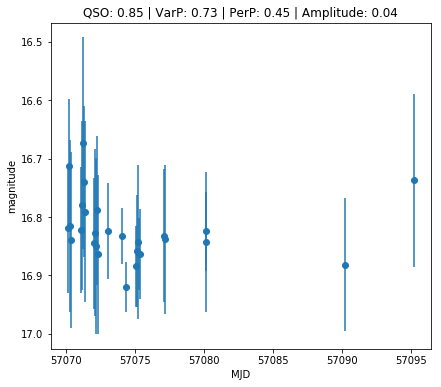

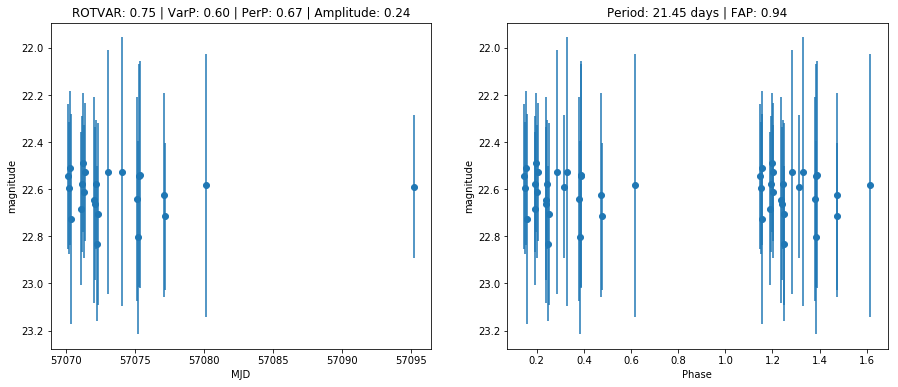

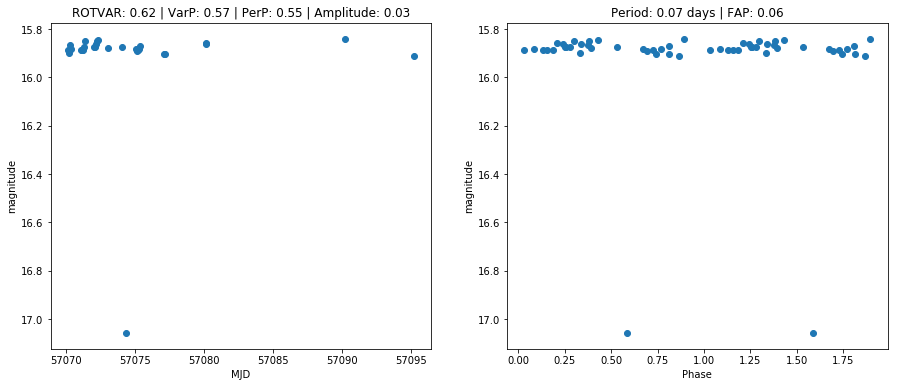

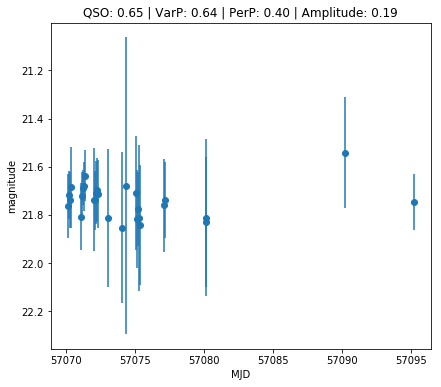

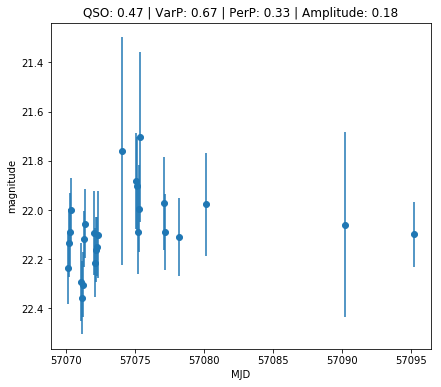

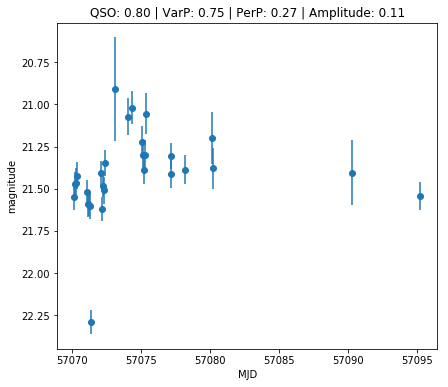

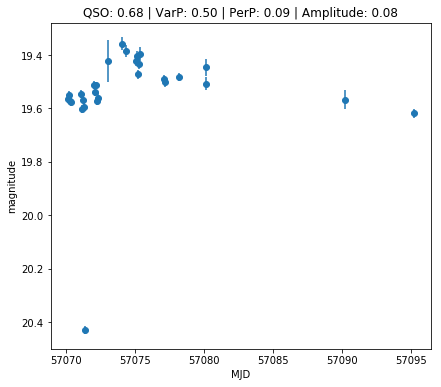

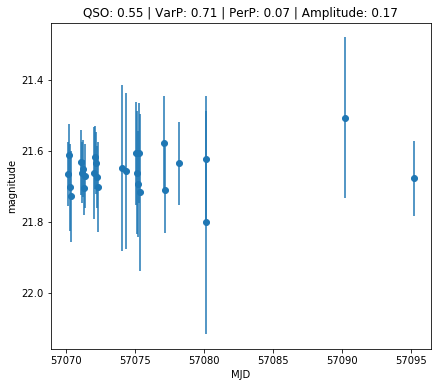

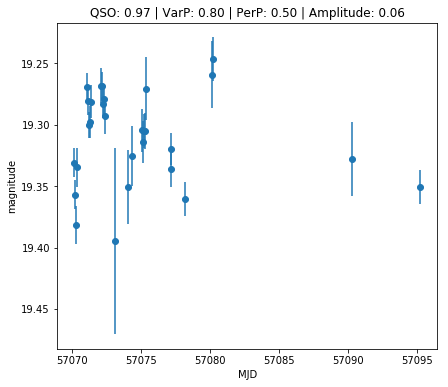

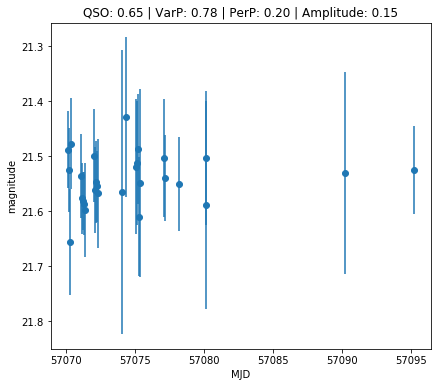

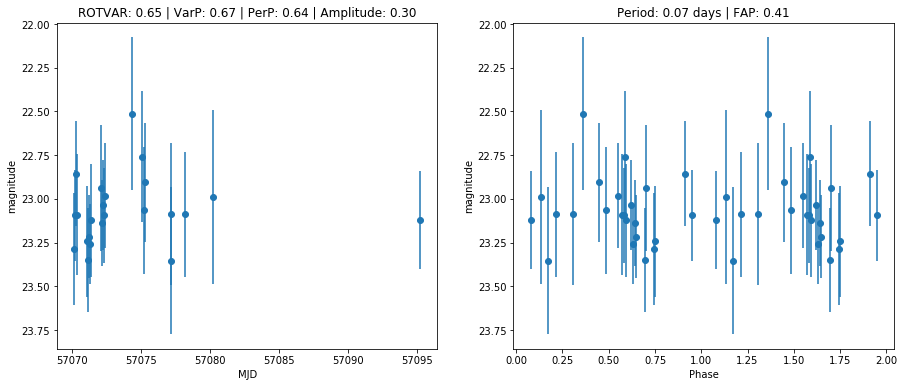

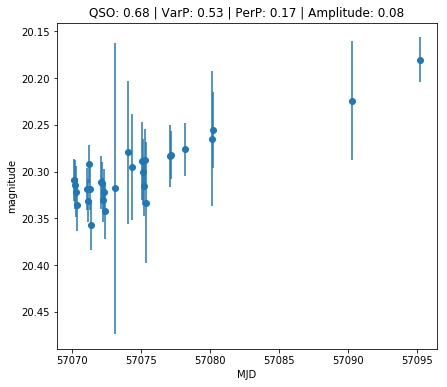

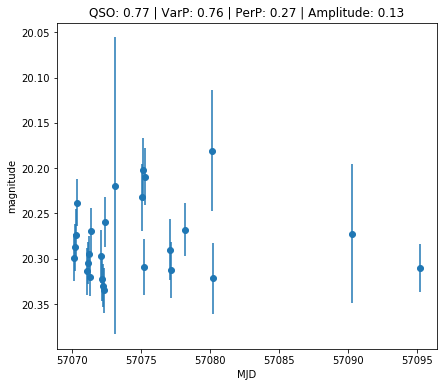

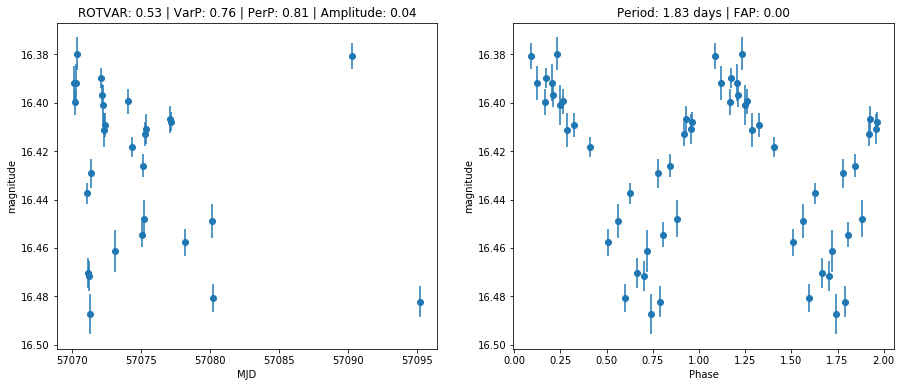

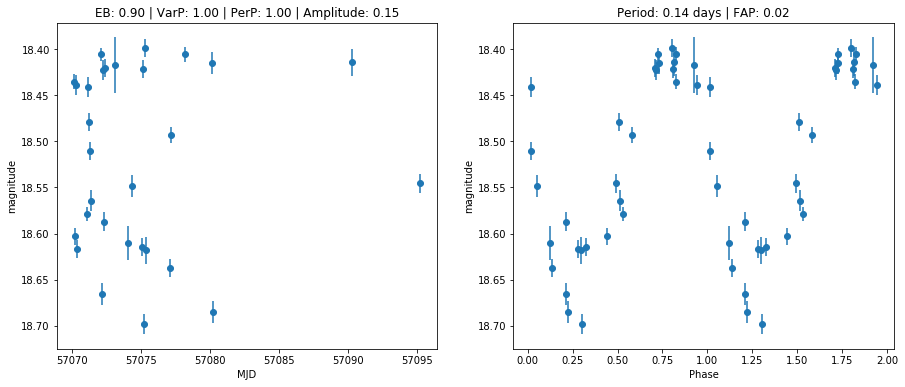

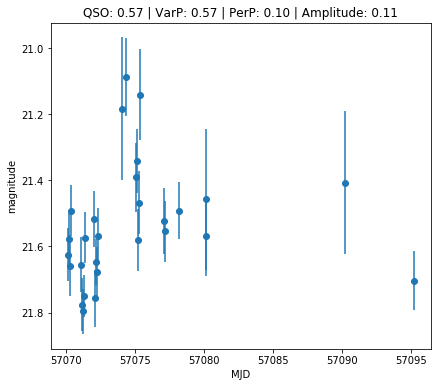

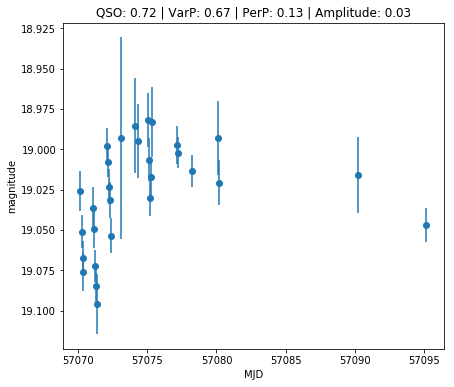

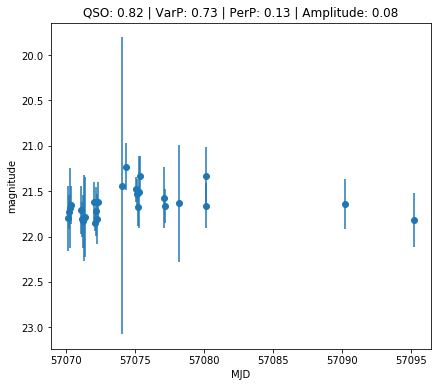

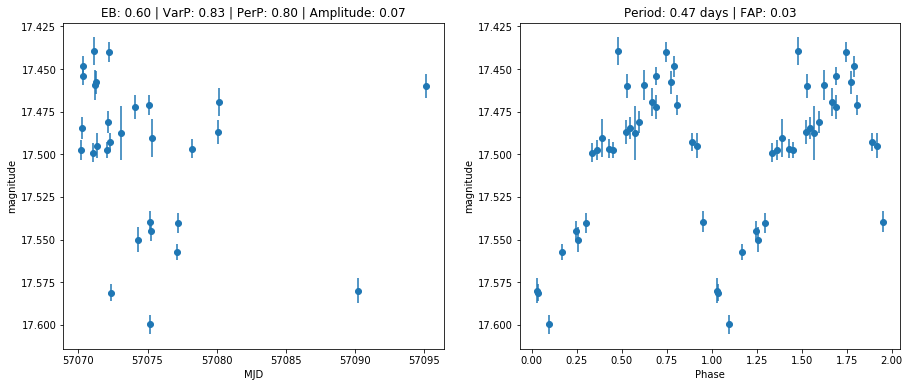

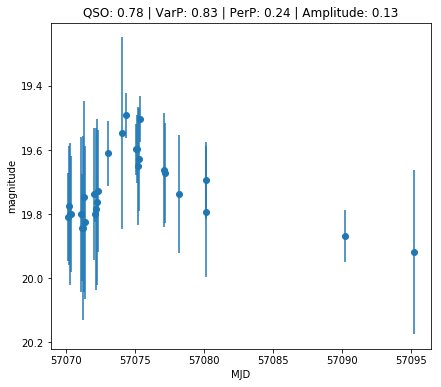

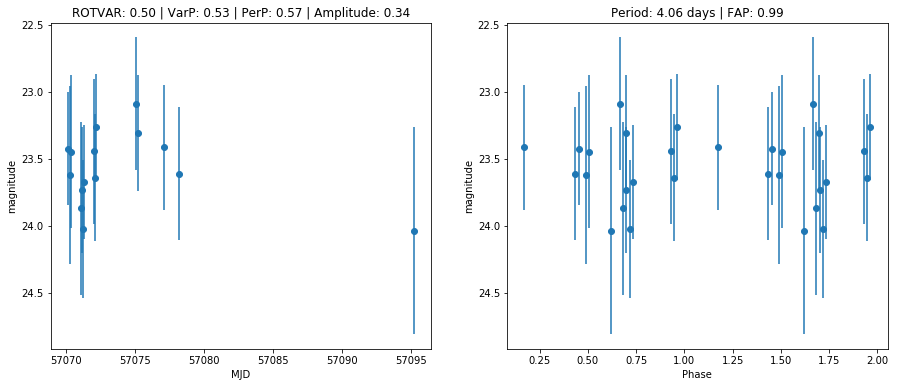

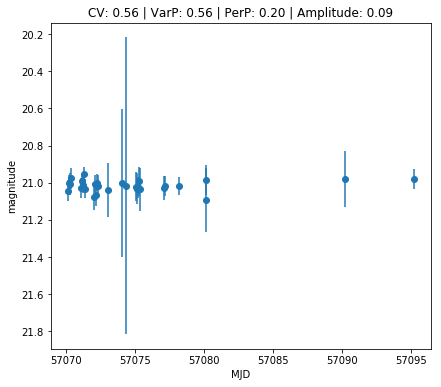

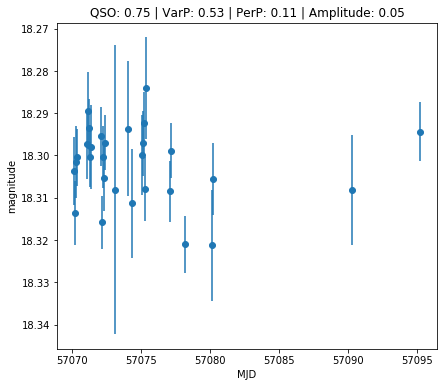

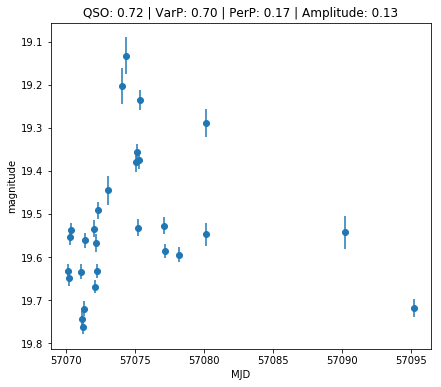

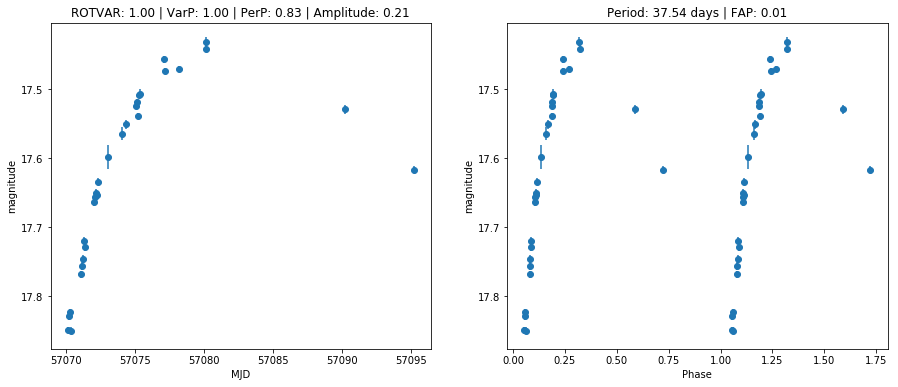

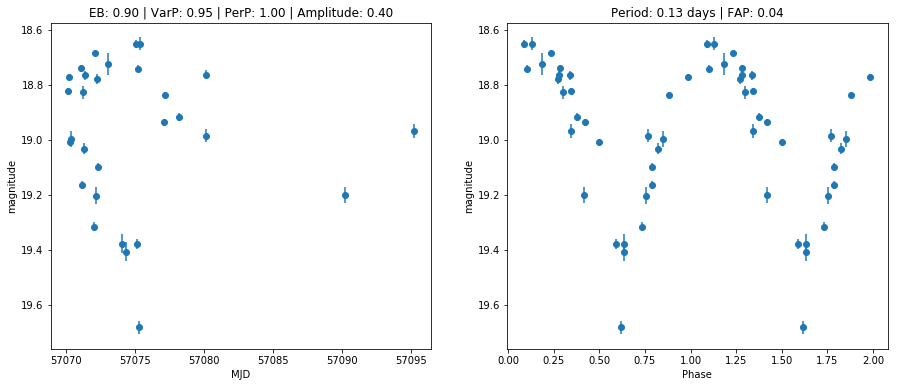

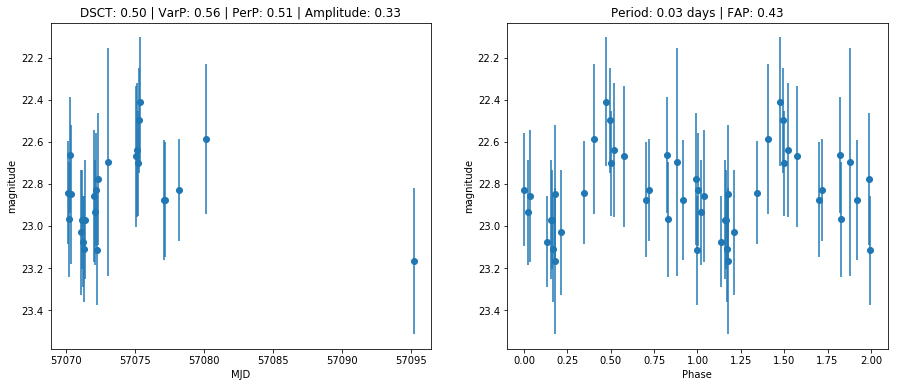

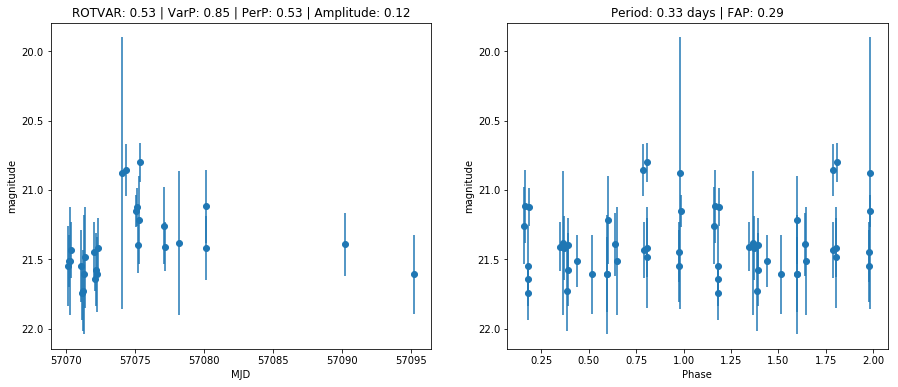

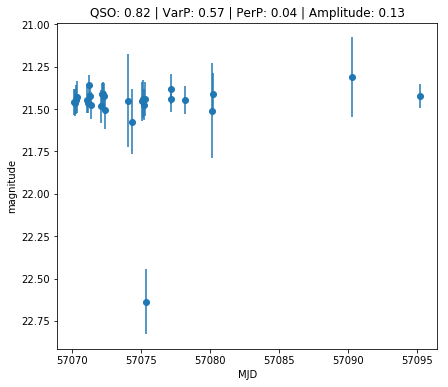

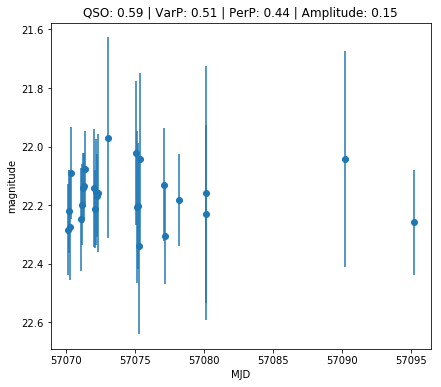

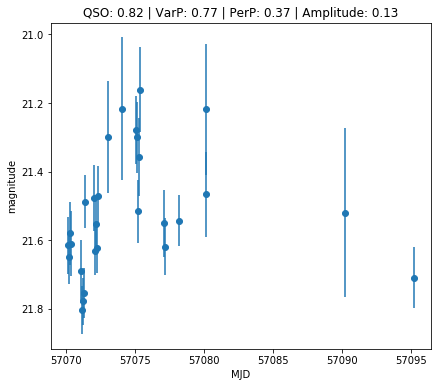

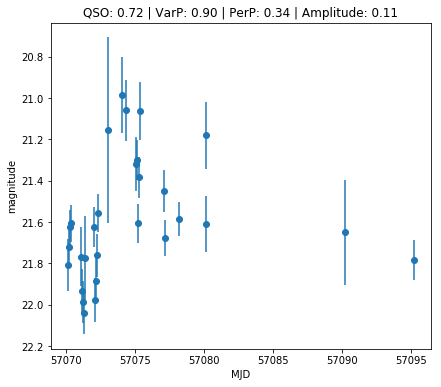

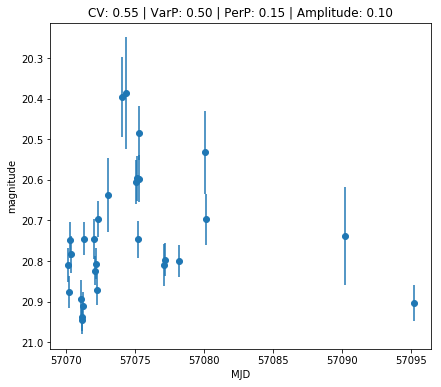

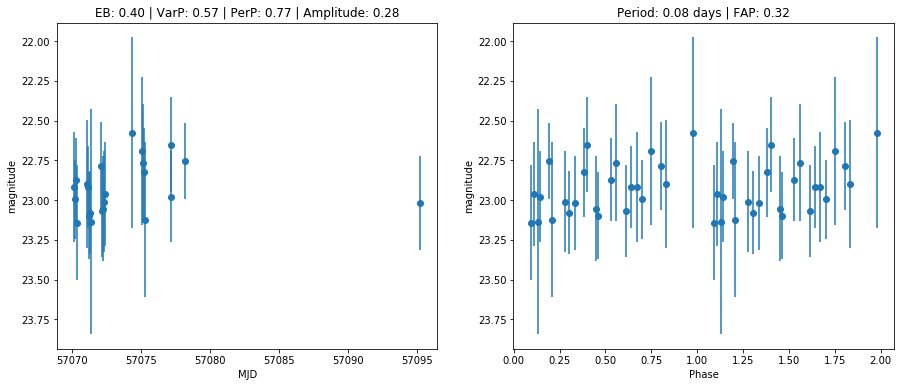

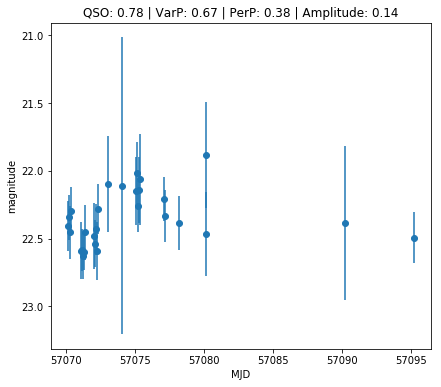

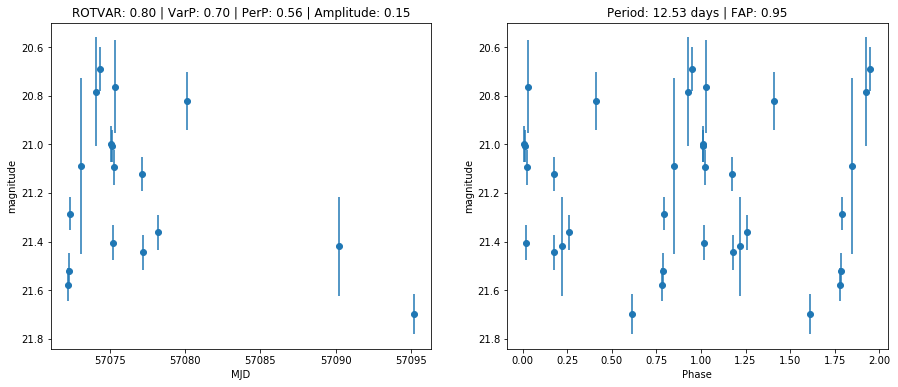

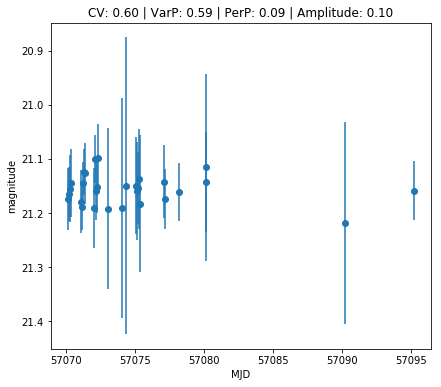

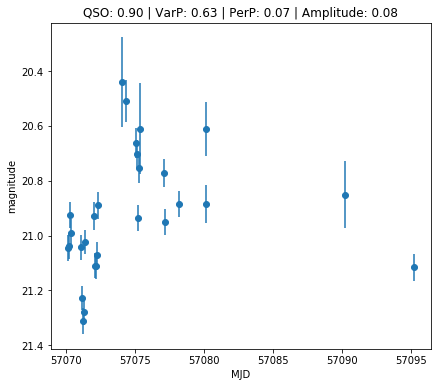

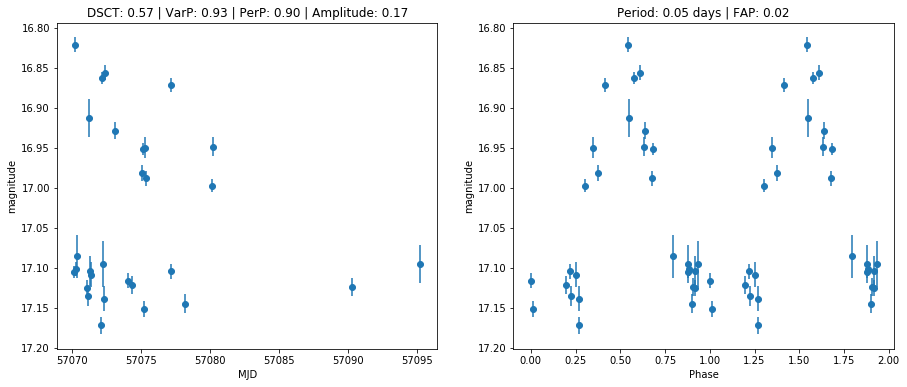

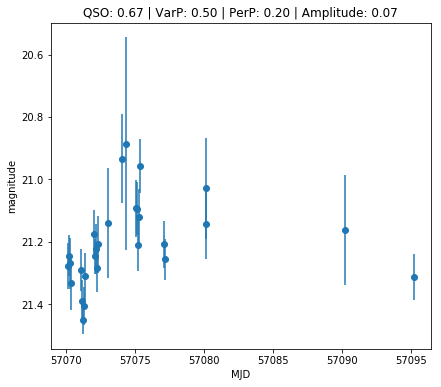

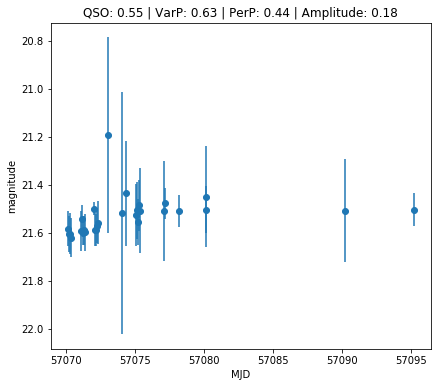

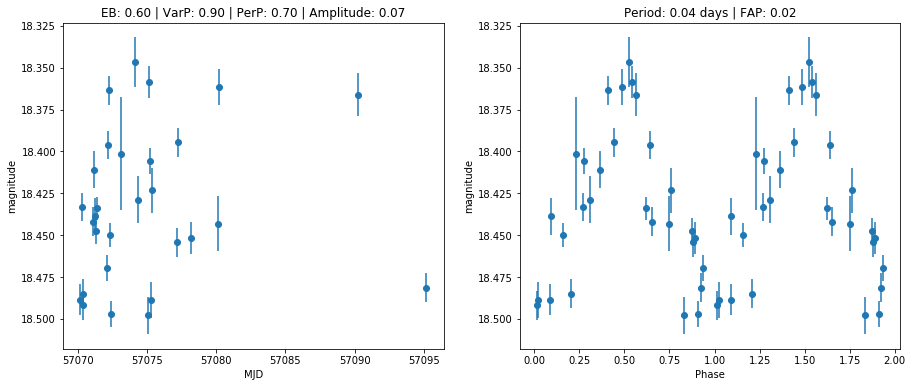

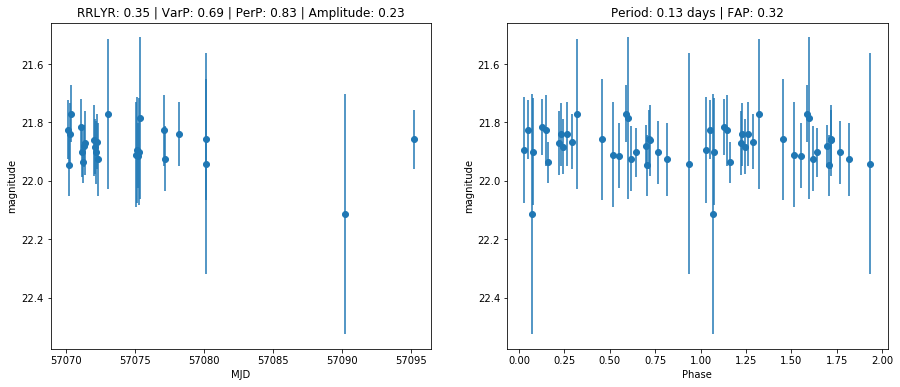

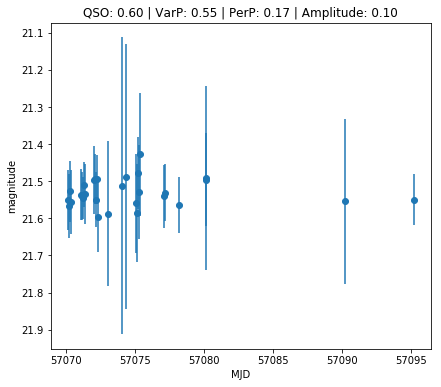

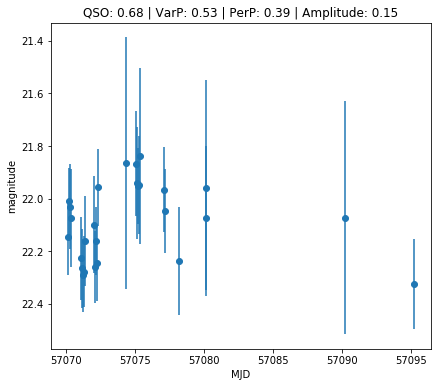

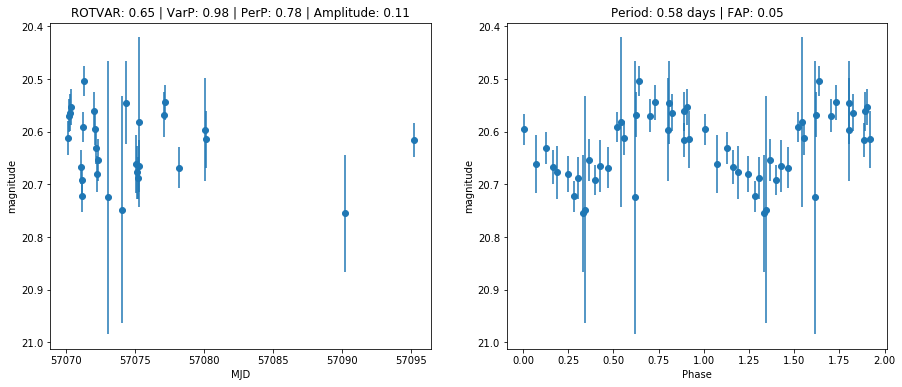

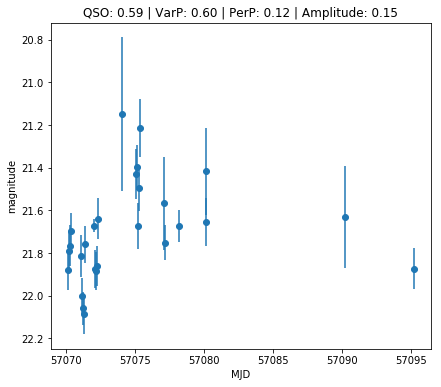

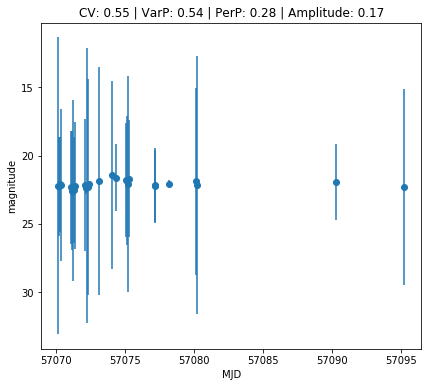

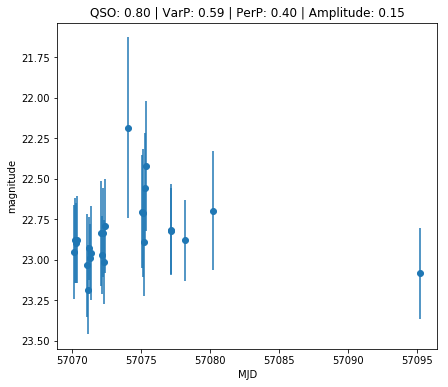

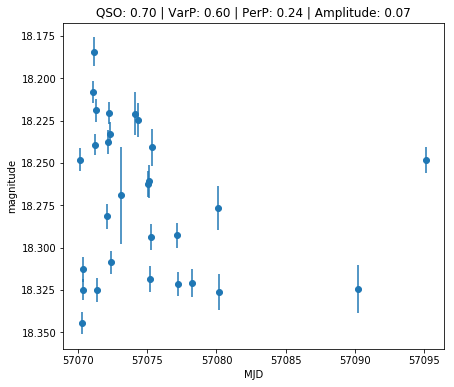

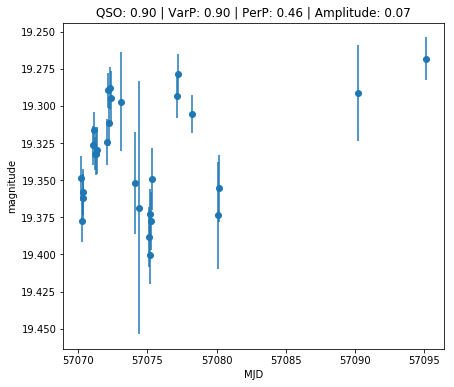

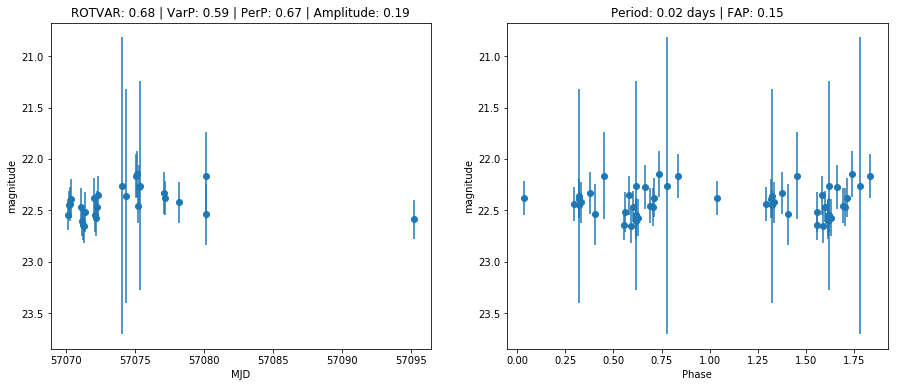

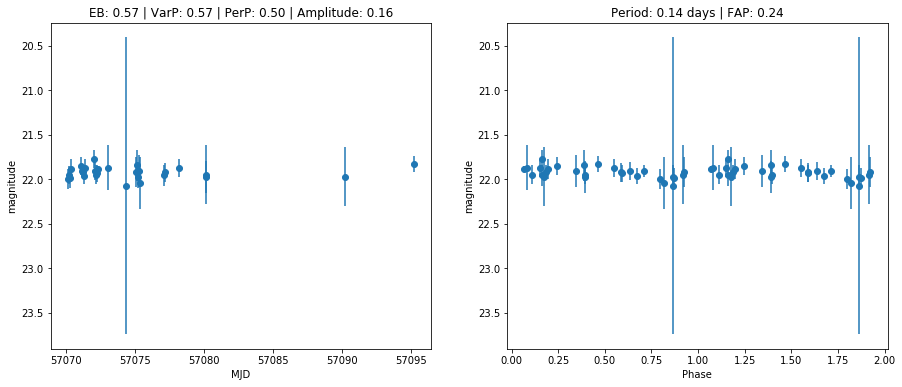

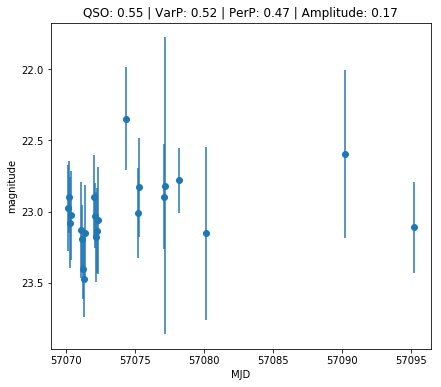

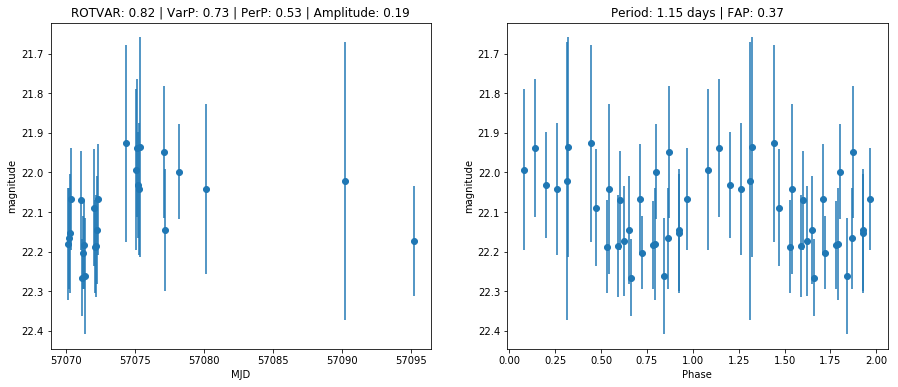

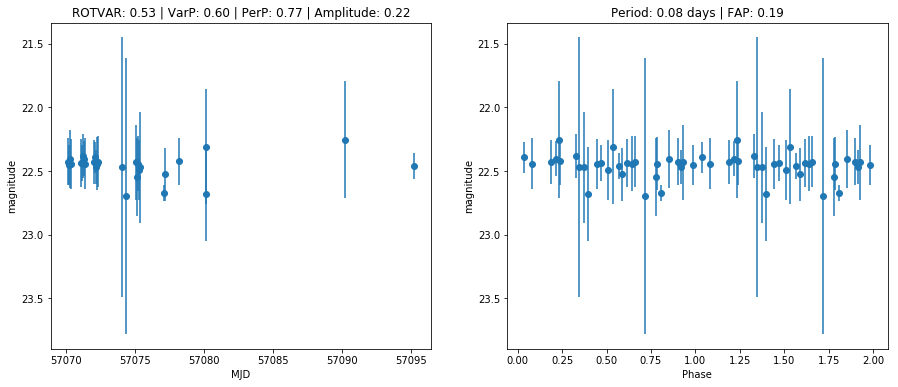

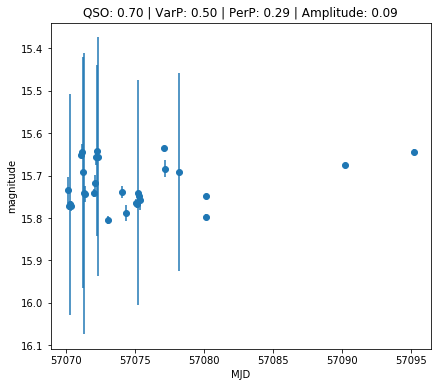

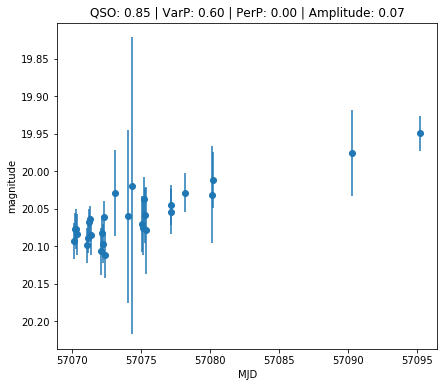

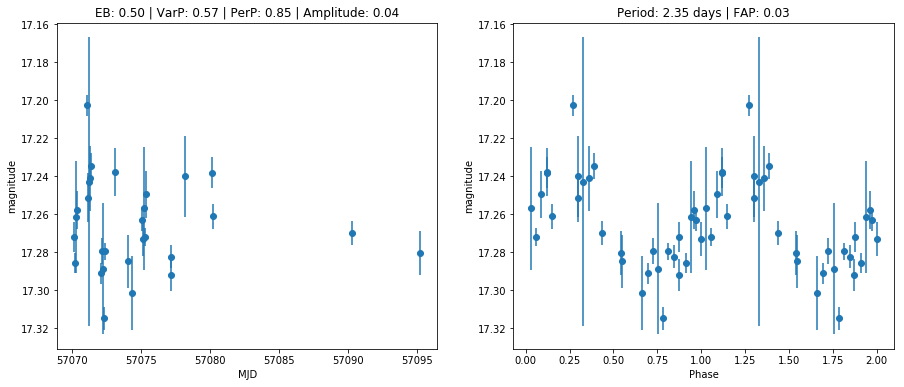

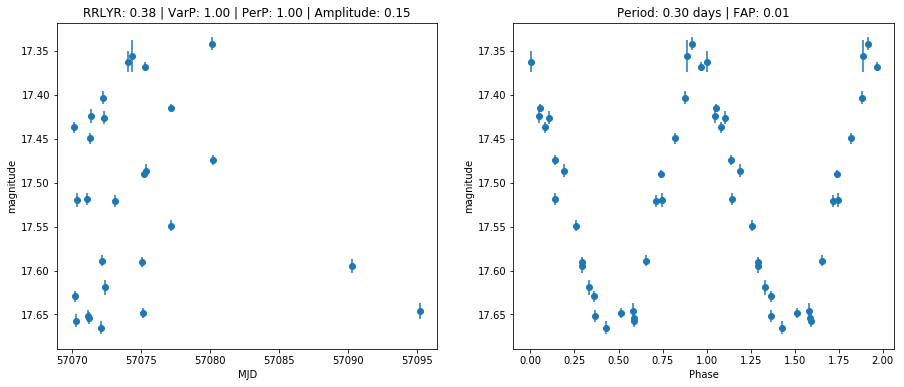

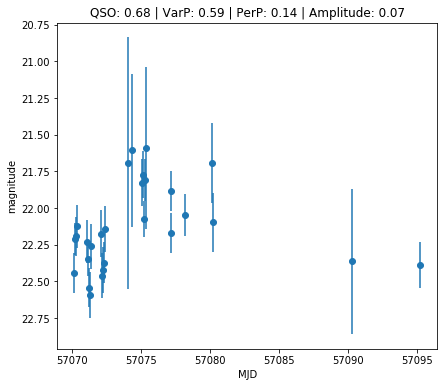

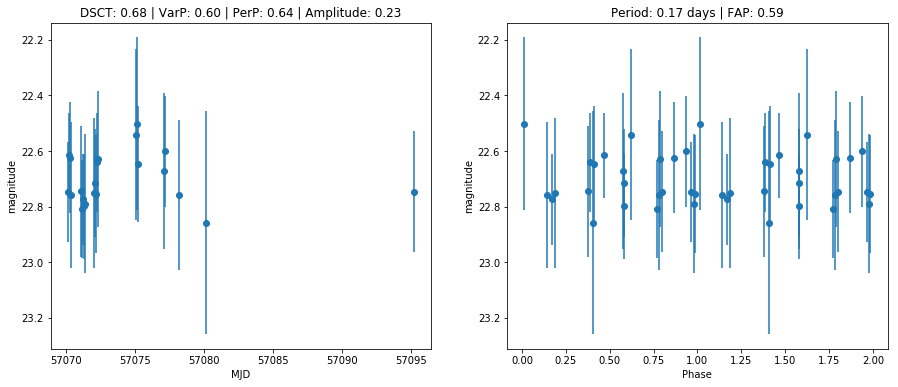

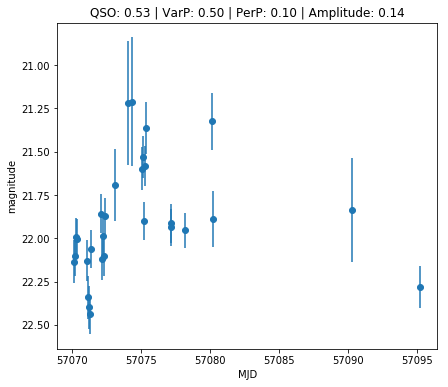

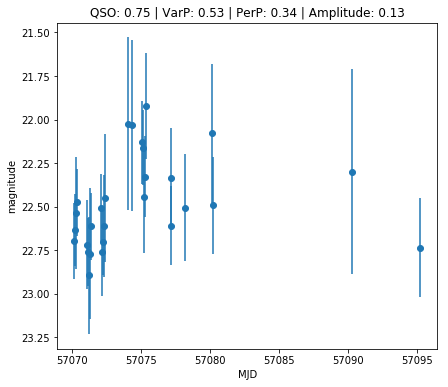

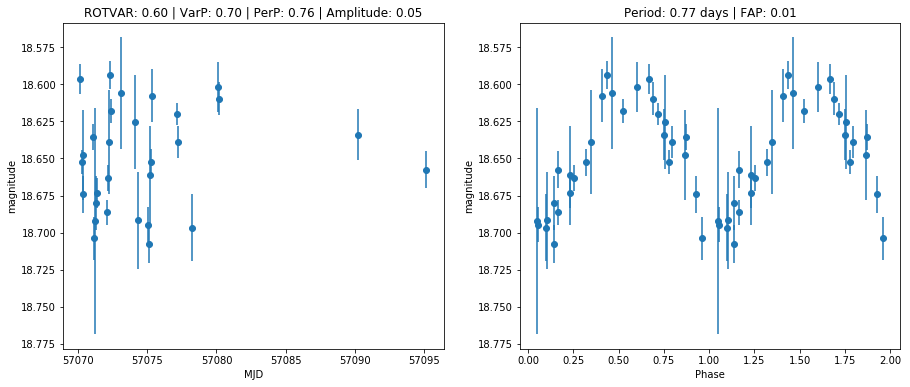

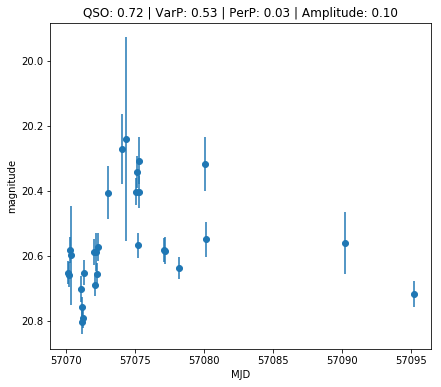

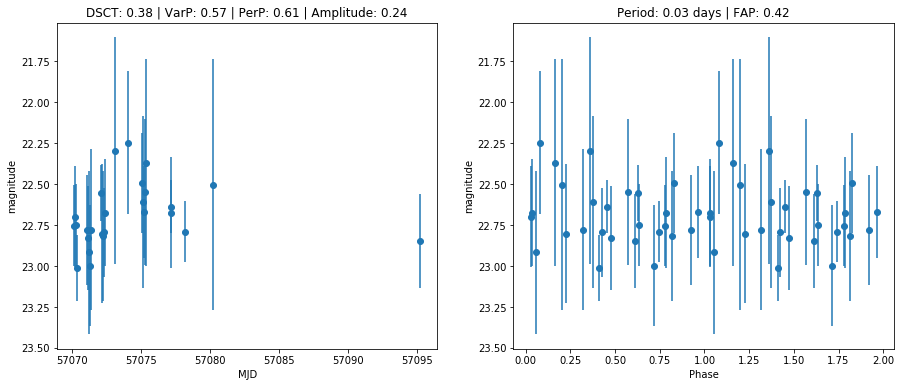

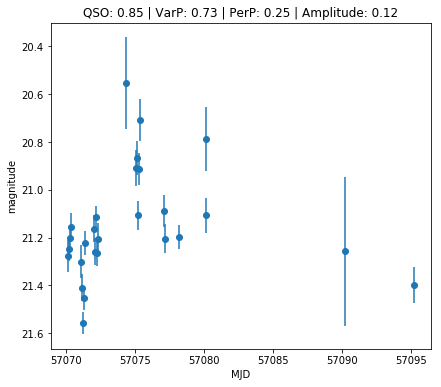

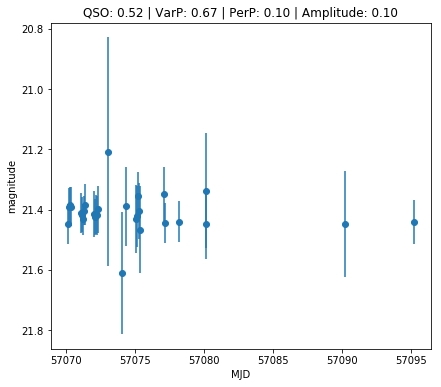

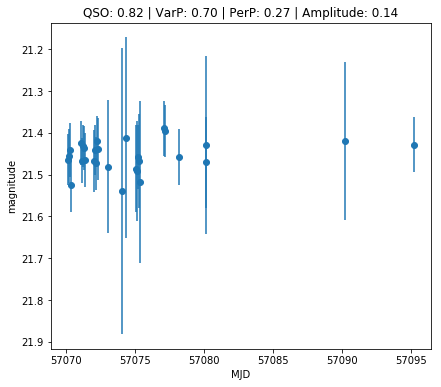

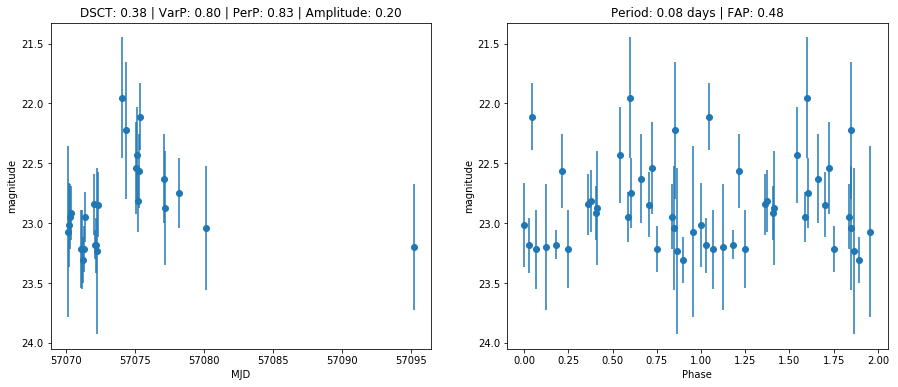

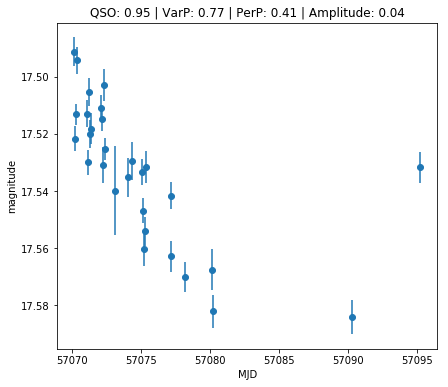

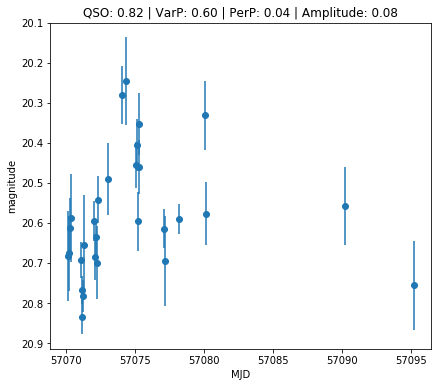

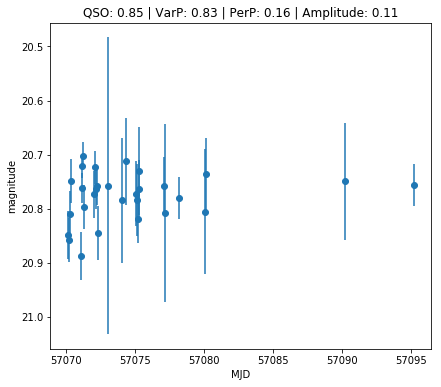

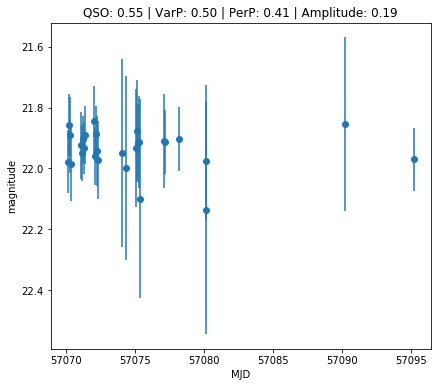

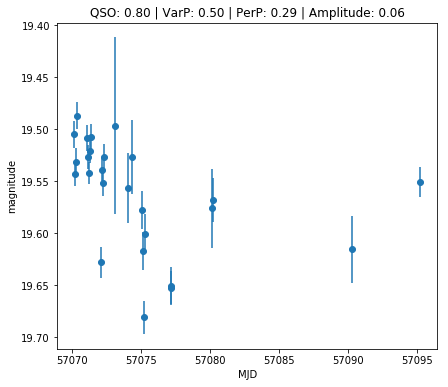

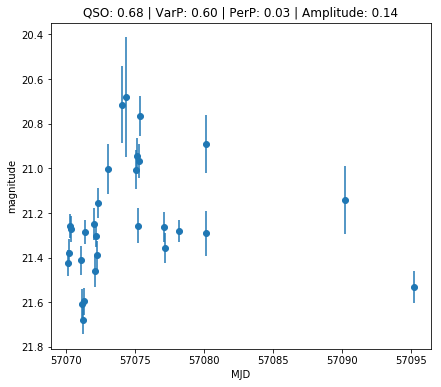

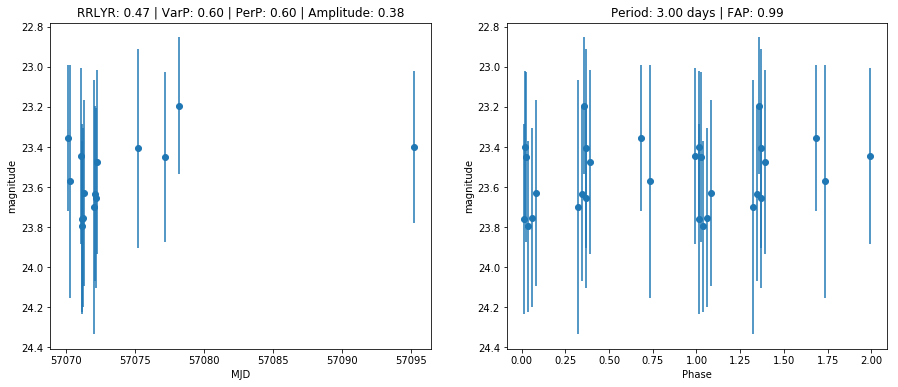

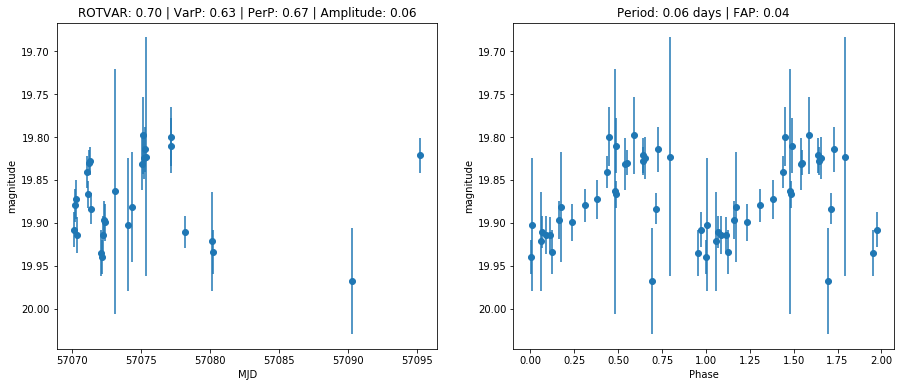

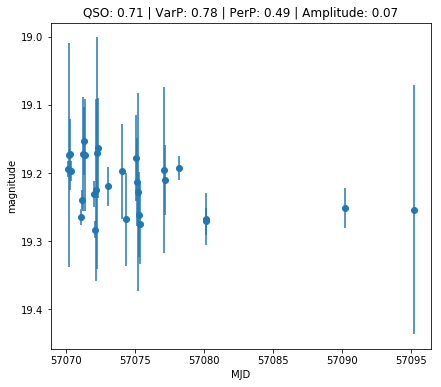

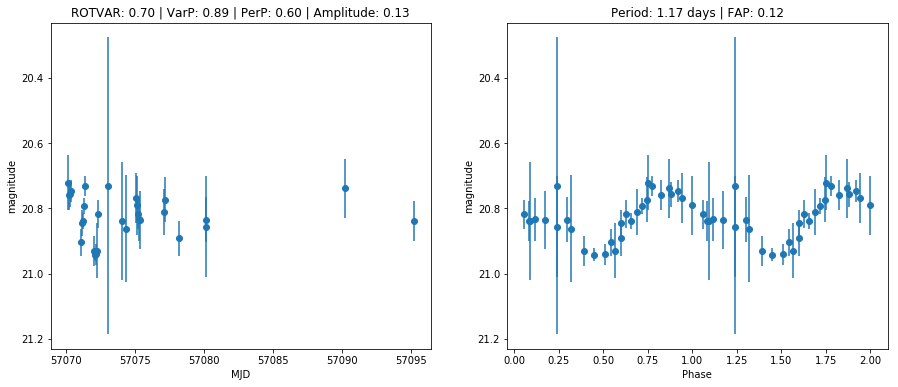

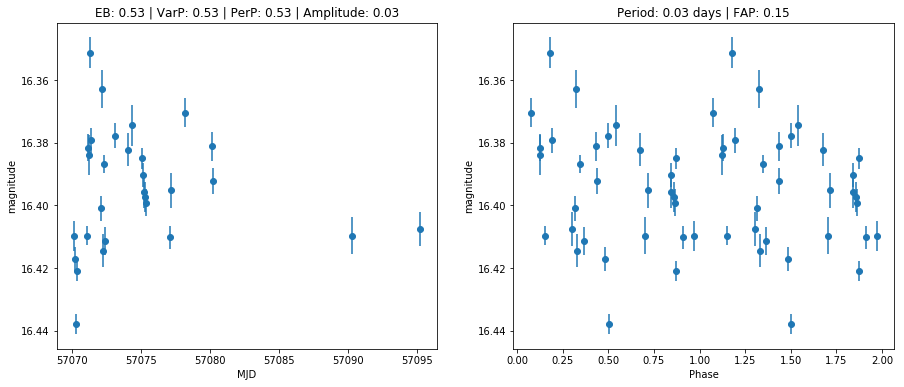

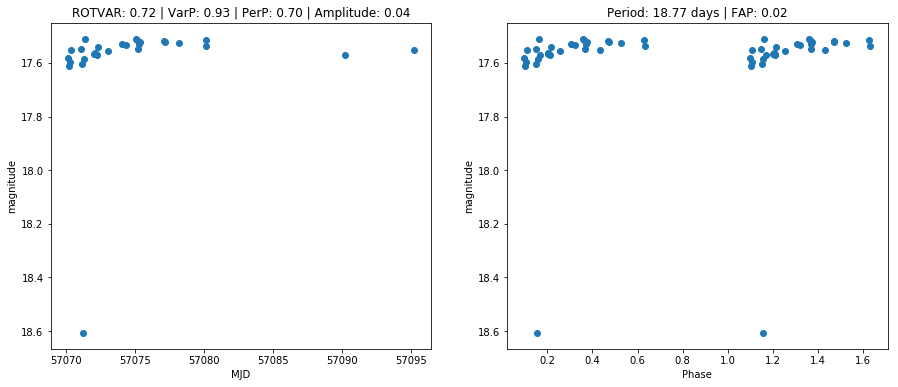

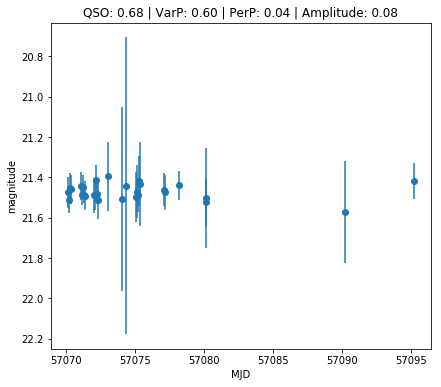

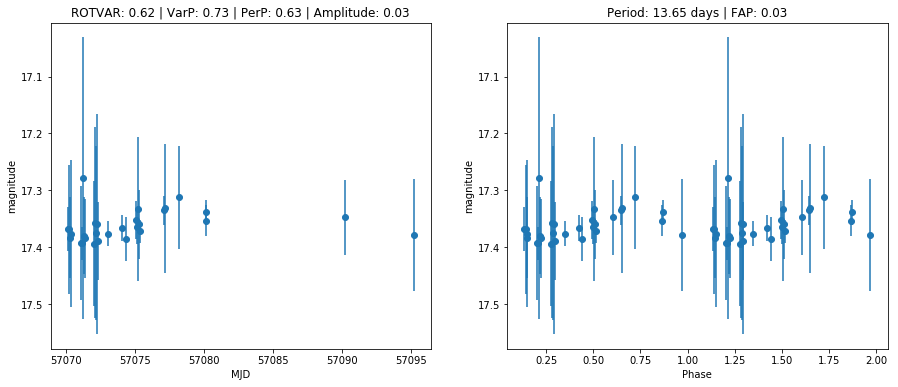

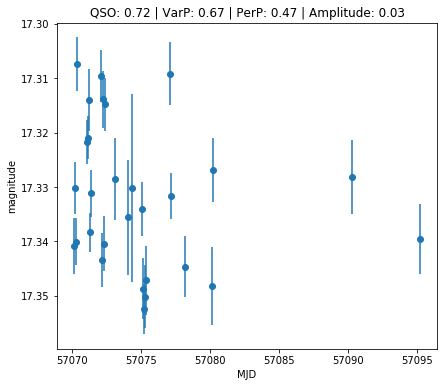

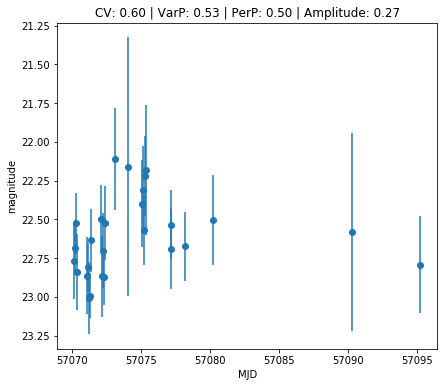

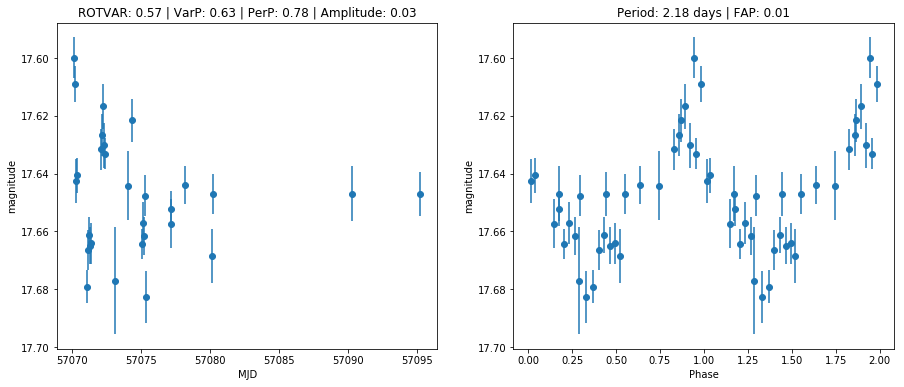

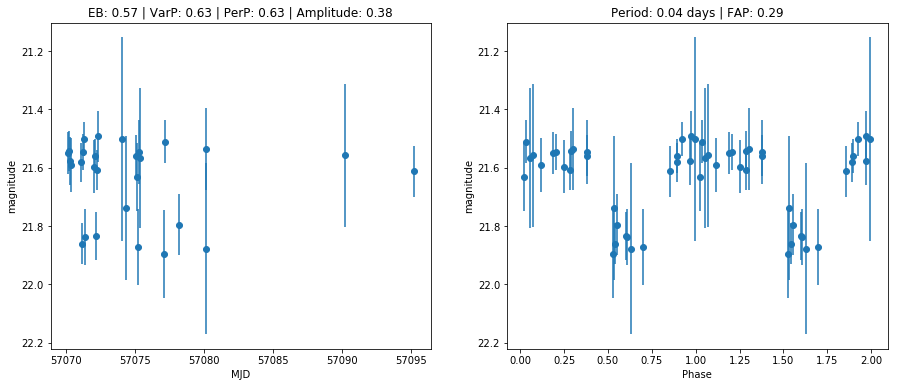

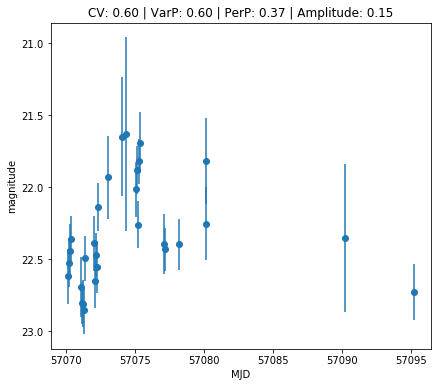

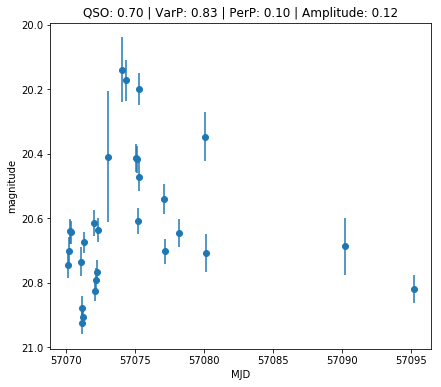

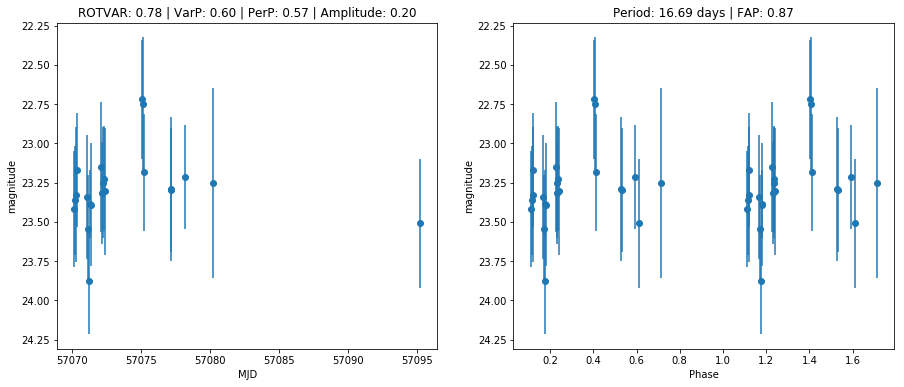

<Figure size 1080x432 with 0 Axes>

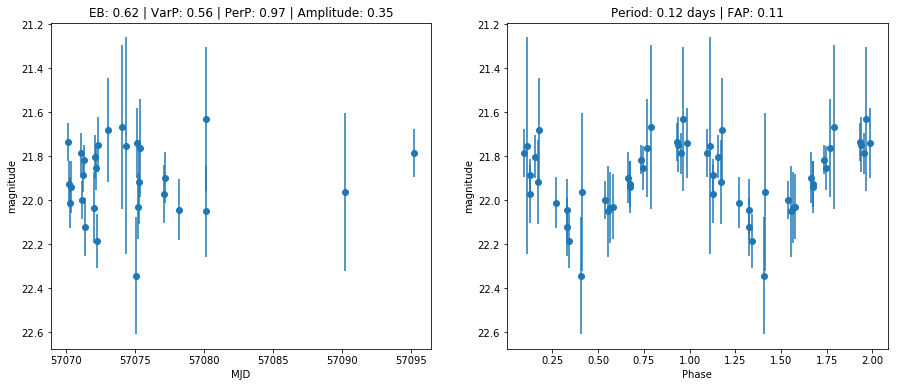

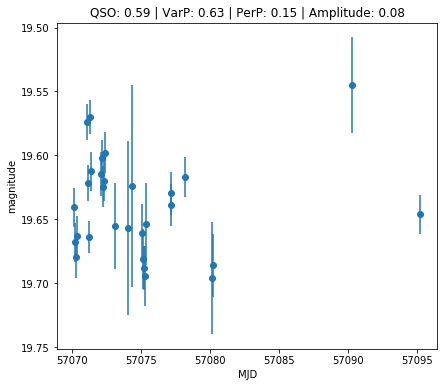

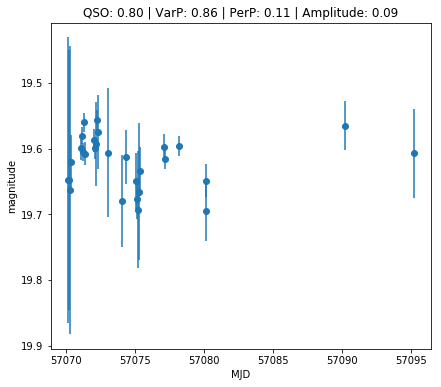

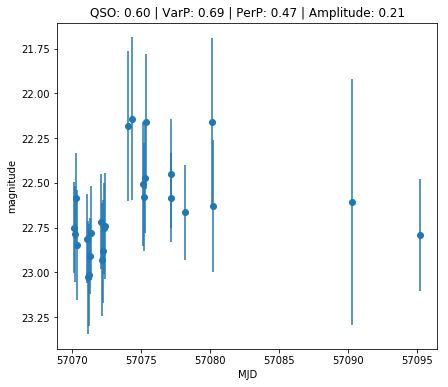

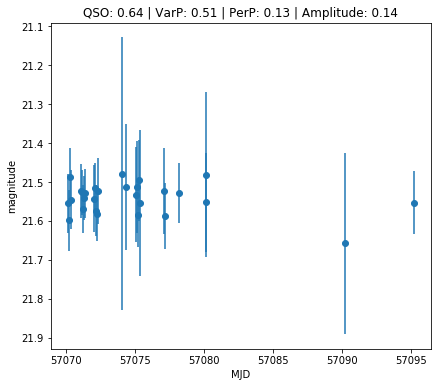

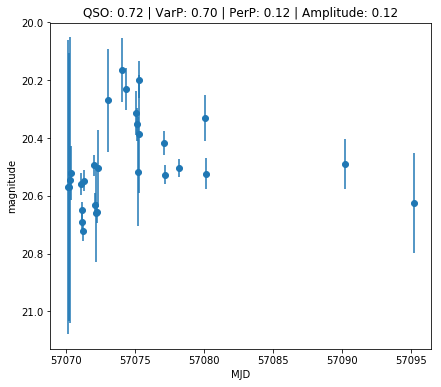

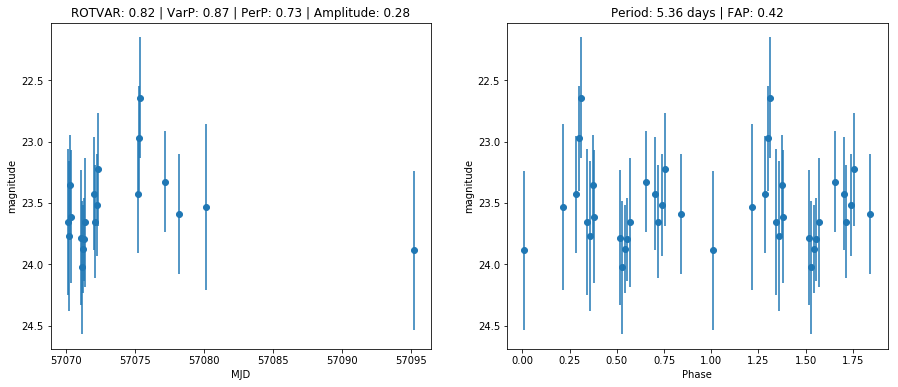

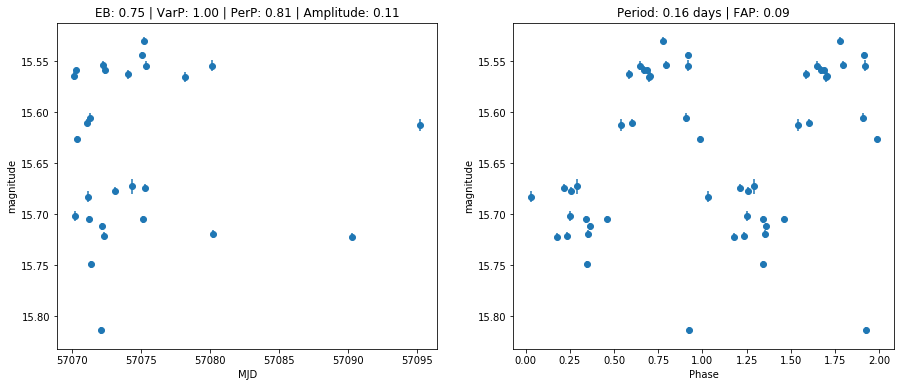

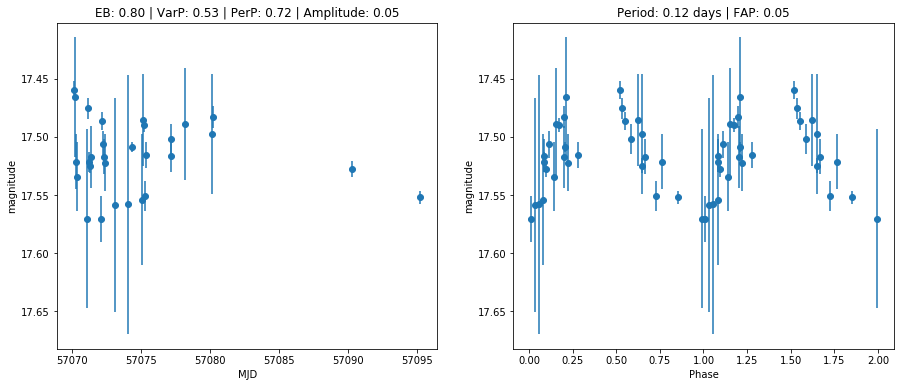

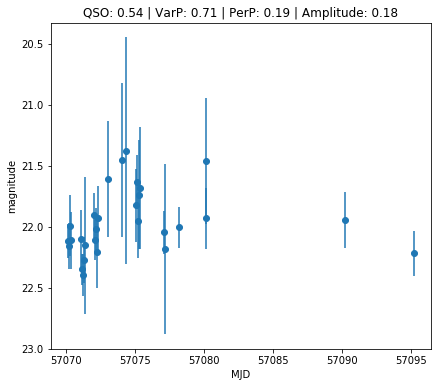

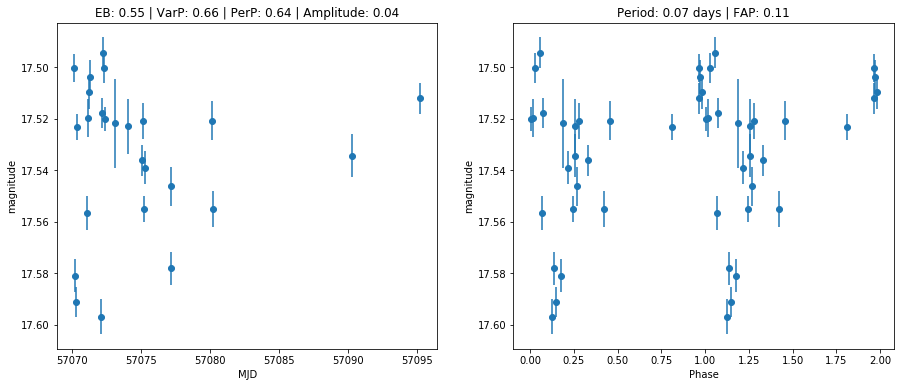

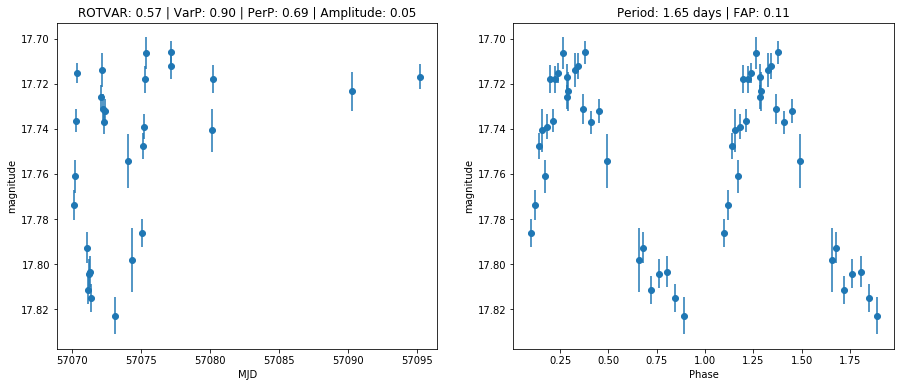

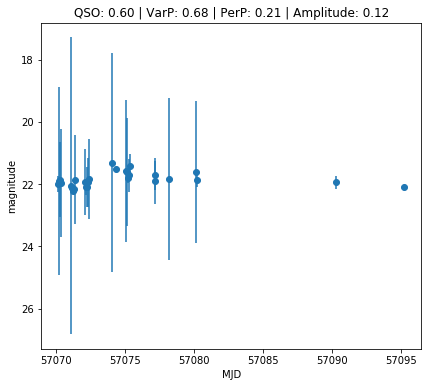

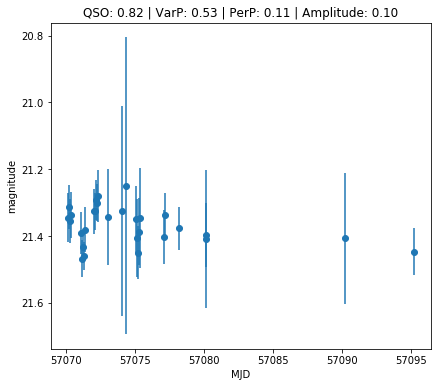

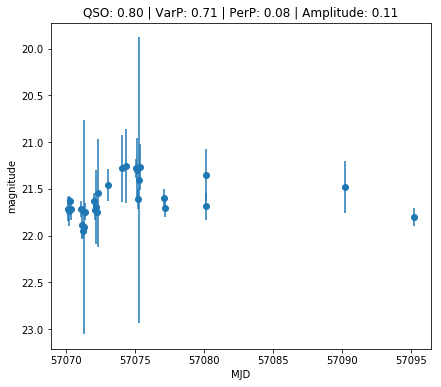

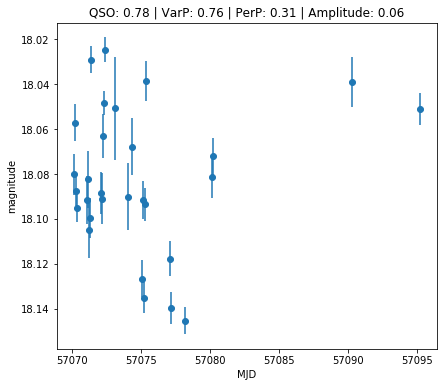

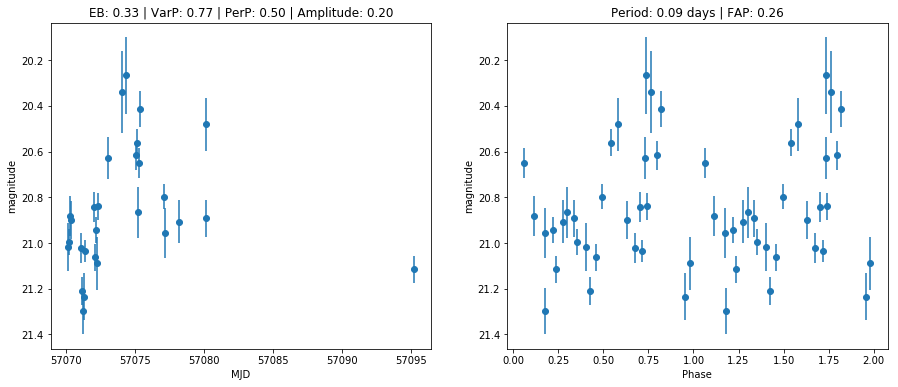

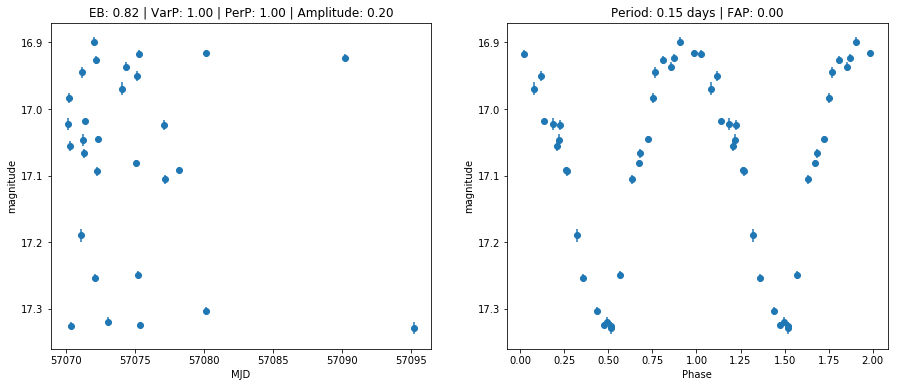

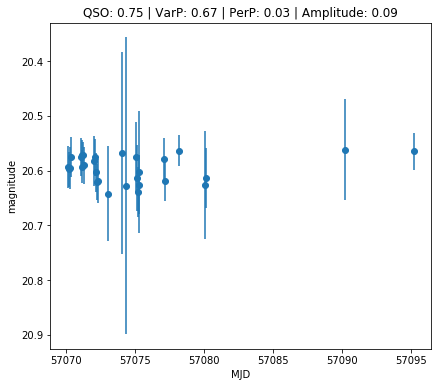

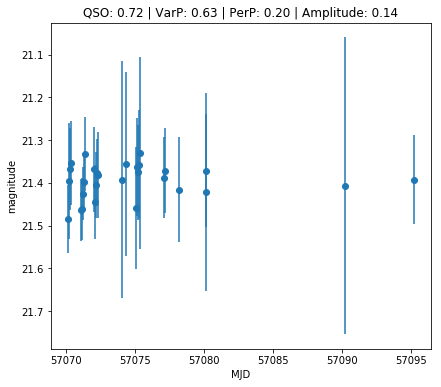

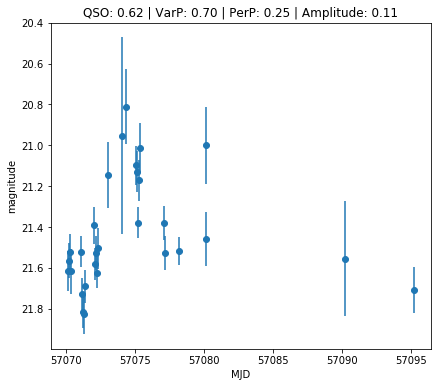

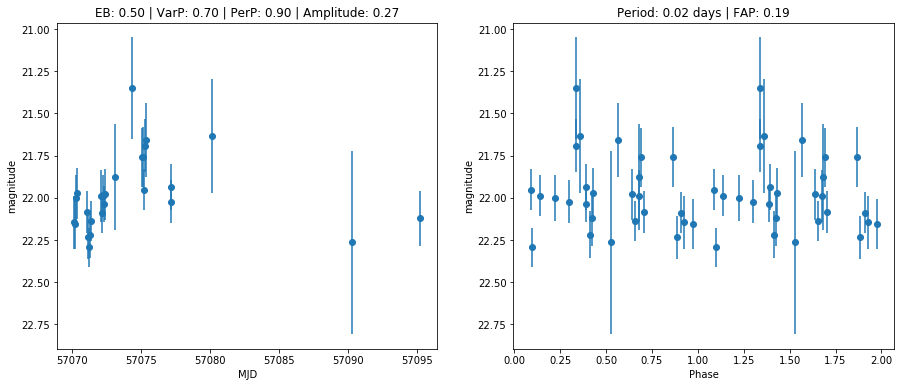

In [54]:
for idx,row in dfm.loc[w_variable].iterrows():
    try:
        plot_hits(row)
    except FileNotFoundError:
        print(f'missing {row["ID"]}')
        continue

While the QSOs and CVs show variability it is difficult to assess how reliably they are detected in HiTS.  However, periodic variables with `Period_fit < 0.15` seem to be quite reliable.  Therefore we will dump two catalogs for future use: one of all the variables overlapping our fields, and one of "high-confidence periodic sources".  We'll commit these to the `data` directory of the `ap_pipe-notebooks` repo.

In [55]:
# write out a small version of the features that overlaps with our fields
from astropy.table import Table
t = Table.from_pandas(dfm[w_variable])
t.write('data/HiTS_DR1_variables_DM-dataset-subset.fits', overwrite=True)
t = Table.from_pandas(dfm[w_variable & (dfm['Period_fit'] < 0.15)])
t.write('data/HiTS_DR1_good_periodic_variables_DM-dataset-subset.fits', overwrite=True)

In [56]:
np.sum(w_variable & (dfm['Period_fit'] < 0.15))

44

So we have 44 high-confidence periodic variables in our field.